# CS 533 Project - TVCA analysis
by Abishai Joy and Ravishankar

## Purpose and Context
The purpose of this notebook is to perform an exploratory analysis on [TVCA](http://www.biketreasurevalley.org/) data

- Obtain TVCA data from Mike Stefancic
- Set up a Jupyter notebook and data set to begin a new analysis
- Carry out an exploratory analysis to understand a data set’s contents and communicate them to others.


## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'''
Note: You may need to install simpledf usin `pip` because the conda installation is not 
      supported for python versions >3.4
'''
from simpledbf import Dbf5 

## Loading Data and Cleaning Up

All binary files are in the `bin/` folder

### `bike-count-master-summary-updated-2019.xlsx` 
This data file was provided to us by Mike and contains TVCA collected data - bike counts observed at different intersections in Boise from 2007 to 2019

In [2]:
bike_count = pd.ExcelFile('bin/Bike Count-Master Summary-UPDATED 2019.xlsx')

The excel file has multiple sheets with different headers and data.

Let us first take a look at the number of sheets and what they are called

In [3]:
print("# of sheets: ", len(bike_count.sheet_names))
bike_count.sheet_names

# of sheets:  22


['Overall',
 'ACHD',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012-May',
 '2012-September',
 '2013-May',
 '2013-September',
 '2014-May',
 '2014-September',
 '2015-May JUB',
 '2015 - Sept',
 '2016- May',
 '2016- Sept',
 'NO counts -2017 - May',
 'NO counts 2017 - Sept',
 '2018 - May',
 '2018 - Sept',
 '2019 - May']

The excel file has 22 different sheets, so we save each sheet as a pandas data frame

The first sheet is called **Overall** and contains summaries of bike counts acrosse various intersection in Boise from 2007 to 2019 with some missing data for some years

In [4]:
data_overall = pd.read_excel(bike_count,'Overall')
data_overall.head()

,Street_name,Location,2007,2008,2009,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-05-01 00:00:00,2019-05-01 00:00:00,Unnamed: 15,Total,Average
0,Bannock,03rd / Bannock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,52,52.0
1,Myrtle,03rd / Myrtle,NaN,NaN,NaN,NaN,151.0,NaN,NaN,59.0,150.0,95.0,133.0,NaN,NaN,NaN,588,117.6
2,Idaho,05th / Idaho,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,28.0
3,O'Farrell,06th / O'Farrell,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,62.0
4,Union,06th / Union,NaN,NaN,NaN,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,137.0


According to Mike, we are only intereseted in the data from 2010 onwards so we drop the `2007`, `2008` and `2009` columns from the `data_overall` data frame. 

In [5]:
# Make col names a string
data_overall.columns = data_overall.columns.map(str)

# Drop unwanted cols
data_overall.drop(columns=['2007', '2008', '2009'], inplace=True)
data_overall.head()

,Street_name,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-05-01 00:00:00,2019-05-01 00:00:00,Unnamed: 15,Total,Average
0,Bannock,03rd / Bannock,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,52,52.0
1,Myrtle,03rd / Myrtle,NaN,151.0,NaN,NaN,59.0,150.0,95.0,133.0,NaN,NaN,NaN,588,117.6
2,Idaho,05th / Idaho,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,28.0
3,O'Farrell,06th / O'Farrell,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,62.0
4,Union,06th / Union,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,137.0


Cleanup the columns

In [6]:
data_overall.drop(columns=['Unnamed: 15'], inplace=True)
data_overall.rename(columns={"2015-05-01 00:00:00": "2015-May", '2019-05-01 00:00:00':'2019-May'}, inplace=True)
data_overall.head()

,Street_name,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average
0,Bannock,03rd / Bannock,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,52,52.0
1,Myrtle,03rd / Myrtle,NaN,151.0,NaN,NaN,59.0,150.0,95.0,133.0,NaN,NaN,588,117.6
2,Idaho,05th / Idaho,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,28,28.0
3,O'Farrell,06th / O'Farrell,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,62,62.0
4,Union,06th / Union,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,137,137.0


For the time being, we assign 0 to any missing values. Mike is working on getting the rest of the data filled

In [7]:
data_overall.fillna(0, inplace=True)
data_overall.head()

,Street_name,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average
0,Bannock,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52.0
1,Myrtle,03rd / Myrtle,0.0,151.0,0.0,0.0,59.0,150.0,95.0,133.0,0.0,0.0,588,117.6
2,Idaho,05th / Idaho,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,28,28.0
3,O'Farrell,06th / O'Farrell,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,62,62.0
4,Union,06th / Union,0.0,0.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,137,137.0


The second sheet is called **ACHD** and is empty so we ignore it.

The third sheet is called **2007** and contains bike counts across various intersection in Boise in 2007. 
- The data is split by gender and further by whether the bike was on a stree or a side walk. 
- Data is also vailable on how many bikers were wearing helmets and how many weren't. 

In [8]:
data_2007 = pd.read_excel(bike_count,'2007')
data_2007.head()

,Location,Date,Time,Total,Men,On Street,On Sidewalk,With Helmets,Without Helmets,Women,On Street.1,On Sidewalk.1,With Helmets.1,Without Helmets.1,Volunteer Name
0,8th / Fort,2007-05-08,AM,82.0,48.0,31.0,17.0,28.0,23.0,34.0,11.0,22.0,16.0,18.0,K Lundstrom
1,10th / Bannock,2007-05-10,AM,69.0,49.0,43.0,6.0,30.0,19.0,20.0,16.0,4.0,7.0,13.0,K Lundstrom
2,13th / Fort,2007-04-24,AM,51.0,35.0,23.0,12.0,27.0,8.0,16.0,7.0,9.0,10.0,6.0,M Andrew Tripp
3,23rd / State,2007-05-01,AM,18.0,6.0,2.0,4.0,3.0,3.0,12.0,0.0,12.0,8.0,4.0,M Andrew Tripp
4,27th / State,2007-05-09,PM,34.0,26.0,8.0,18.0,9.0,17.0,8.0,1.0,7.0,4.0,4.0,K Lundstrom


In [9]:
data_2007.tail()

,Location,Date,Time,Total,Men,On Street,On Sidewalk,With Helmets,Without Helmets,Women,On Street.1,On Sidewalk.1,With Helmets.1,Without Helmets.1,Volunteer Name
27,Vista / Overland,2007-05-01,AM,15.000000,12.000000,3.000000,9.000000,6.000000,6.000000,3.000000,1.000000,2.000000,1.000000,2.000000,Chris
28,VMP / Chinden,2007-04-24,PM,63.000000,50.000000,15.000000,35.000000,16.000000,34.000000,13.000000,4.000000,9.000000,6.000000,7.000000,Don K
29,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaT,Total,897.000000,660.000000,375.000000,275.000000,368.000000,286.000000,237.000000,92.000000,144.000000,119.000000,118.000000,NaN
31,NaN,NaT,Average,30.931034,22.758621,12.931034,9.482759,12.689655,9.862069,8.172414,3.172414,4.965517,4.103448,4.068966,NaN


Trim the last 3 rows

In [10]:
data_2007.drop(data_2007.tail(3).index, inplace=True)

According to Mike we are only interested in the `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [11]:
data_2007_trimmed = data_2007[['Location', 'Date', 'Time', 'Total']]
data_2007_trimmed.head()

,Location,Date,Time,Total
0,8th / Fort,2007-05-08,AM,82.0
1,10th / Bannock,2007-05-10,AM,69.0
2,13th / Fort,2007-04-24,AM,51.0
3,23rd / State,2007-05-01,AM,18.0
4,27th / State,2007-05-09,PM,34.0


The fourth sheet is called **2008** and contains bike counts across various intersection in Boise in 2008. 
- The data is split by gender and further by whether the bike was on a street or a side walk. 
- Data is also vailable on how many bikers were wearing helmets and how many weren't. 

In [12]:
data_2008 = pd.read_excel(bike_count,'2008')
data_2008.head()

,Location,Date,Time,Total,Men,On Street,On Sidewalk,With Helmets,Without Helmets,Women,On Street.1,On Sidewalk.1,With Helmets.1,Without Helmets.1,Volunteer Name
0,8th / Fort,2008-09-23,PM,150.0,101.0,55.0,46.0,36.0,65.0,49.0,26.0,23.0,23.0,26.0,Steve Dunlop
1,10th / Bannock,2008-09-24,PM,174.0,116.0,107.0,9.0,39.0,77.0,58.0,45.0,13.0,22.0,36.0,Krista Broderick
2,13th / Fort,2008-09-23,PM,135.0,87.0,58.0,29.0,47.0,40.0,48.0,24.0,24.0,21.0,27.0,Walt Sledzieski
3,36th / Hill / Catalpa,2008-09-23,AM,46.0,32.0,20.0,12.0,21.0,11.0,14.0,8.0,6.0,10.0,4.0,Al Kristal
4,36th / Hill / Catalpa,2008-09-24,PM,50.0,46.0,39.0,7.0,37.0,9.0,4.0,3.0,1.0,3.0,1.0,Amar


In [13]:
data_2008.tail()

,Location,Date,Time,Total,Men,On Street,On Sidewalk,With Helmets,Without Helmets,Women,On Street.1,On Sidewalk.1,With Helmets.1,Without Helmets.1,Volunteer Name
14,Meridian / Franklin,2008-09-24,AM,4.000,3.000,0.0000,3.0000,1.000,2.000,1.0000,0.0,1.0000,0.00,1.0000,Dwight Torey
15,VMP / Chinden,2008-09-24,AM,67.000,58.000,25.0000,33.0000,29.000,29.000,9.0000,4.0,5.0000,7.00,2.0000,Jeff Larsen
16,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaT,Total,1166.000,834.000,513.0000,323.0000,414.000,422.000,331.0000,176.0,155.0000,156.00,175.0000,NaN
18,NaN,NaT,Average,72.875,52.125,32.0625,20.1875,25.875,26.375,20.6875,11.0,9.6875,9.75,10.9375,NaN


Trim the last 3 rows

In [14]:
data_2008.drop(data_2008.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [15]:
data_2008_trimmed = data_2008[['Location', 'Date', 'Time', 'Total']]
data_2008_trimmed.head()

,Location,Date,Time,Total
0,8th / Fort,2008-09-23,PM,150.0
1,10th / Bannock,2008-09-24,PM,174.0
2,13th / Fort,2008-09-23,PM,135.0
3,36th / Hill / Catalpa,2008-09-23,AM,46.0
4,36th / Hill / Catalpa,2008-09-24,PM,50.0


The fifth sheet is called **2010** and contains bike counts across various intersections in Boise in 2010. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [16]:
data_2010 = pd.read_excel(bike_count,'2010')
data_2010.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,08th / Bannock,2010-09-16,AM,131.0,55.0,76.0,33.0,15.0,22.0,61.0,David Peckham
1,08th / Bannock,2010-09-14,PM,267.0,133.0,134.0,25.0,51.0,108.0,83.0,Tacy Hitchcock
2,08th / Fort,2010-09-15,PM,132.0,72.0,60.0,22.0,35.0,50.0,25.0,Cindy Ritchie
3,08th / Greenbelt,2010-09-14,PM,270.0,64.0,206.0,64.0,127.0,0.0,79.0,Mark Ritchie
4,08th / River,2010-09-15,AM,114.0,93.0,21.0,62.0,7.0,31.0,14.0,David Peckham


In [17]:
data_2010.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
26,Vista / Overland,2010-09-15,PM,42.000000,28.000000,14.000000,16.000000,7.000000,12.000000,7.0,Lisa Brady
27,VMP / Chinden,2010-09-15,PM,77.000000,54.000000,23.000000,25.000000,14.000000,29.000000,9.0,Justin Lucas
28,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaT,Total,2687.000000,1397.000000,1290.000000,694.000000,646.000000,703.000000,644.0,NaN
30,NaN,NaT,Average,95.964286,49.892857,46.071429,24.785714,23.071429,25.107143,23.0,NaN


Trim the last 3 rows

In [18]:
data_2010.drop(data_2010.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [19]:
data_2010_trimmed = data_2010[['Location', 'Date', 'Time', 'Total']]
data_2010_trimmed.head()

,Location,Date,Time,Total
0,08th / Bannock,2010-09-16,AM,131.0
1,08th / Bannock,2010-09-14,PM,267.0
2,08th / Fort,2010-09-15,PM,132.0
3,08th / Greenbelt,2010-09-14,PM,270.0
4,08th / River,2010-09-15,AM,114.0


The sixth sheet is called **2011** and contains bike counts across various intersections in Boise in 2011. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [20]:
data_2011 = pd.read_excel(bike_count,'2011')
data_2011.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Myrtle,2011-09-14,PM,151.0,110.0,41.0,52.0,23.0,58.0,18.0,Justin Lucas
1,08th / Bannock,2011-09-15,AM,115.0,44.0,71.0,26.0,28.0,18.0,43.0,Dave Fostch
2,08th / Greenbelt S,2011-09-13,PM,346.0,61.0,285.0,61.0,182.0,0.0,103.0,Amy Stahl
3,08th / River,2011-09-13,PM,249.0,203.0,46.0,104.0,35.0,99.0,11.0,Mark Ritchie
4,28th / Sunset,2011-09-14,AM,23.0,9.0,14.0,4.0,7.0,5.0,7.0,Sarah Lunstrum


In [21]:
data_2011.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
17,VMP / Chinden,2011-09-14,PM,92.000000,53.000000,39.000000,22.000000,22.000000,31.0,17.000000,Robert Stevahn
18,VMP / Greenbelt N,2011-09-14,PM,238.000000,65.000000,173.000000,19.000000,97.000000,46.0,76.000000,John Miyake
19,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaT,Total,2196.000000,984.000000,1212.000000,471.000000,652.000000,513.0,560.000000,NaN
21,NaN,NaT,Average,115.578947,51.789474,63.789474,24.789474,34.315789,27.0,29.473684,NaN


Trim the last 3 rows

In [22]:
data_2011.drop(data_2011.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [23]:
data_2011_trimmed = data_2011[['Location', 'Date', 'Time', 'Total']]
data_2011_trimmed.head()

,Location,Date,Time,Total
0,03rd / Myrtle,2011-09-14,PM,151.0
1,08th / Bannock,2011-09-15,AM,115.0
2,08th / Greenbelt S,2011-09-13,PM,346.0
3,08th / River,2011-09-13,PM,249.0
4,28th / Sunset,2011-09-14,AM,23.0


**From 2012 onwards, data was collected in the Spring and Fall.**

The seventh sheet is called **2012-May** and contains bike counts across various intersections in Boise in 2012 Spring. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [24]:
data_2012_may = pd.read_excel(bike_count,'2012-May')
data_2012_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,08th / Bannock,2012-05-16,AM,148.0,56.0,92.0,19.0,29.0,37.0,63.0,Jim Pace
1,08th / Franklin,2012-05-17,AM,61.0,28.0,33.0,19.0,3.0,9.0,30.0,Andy Query
2,08th / River,2012-05-16,AM,115.0,93.0,22.0,42.0,13.0,51.0,9.0,Dan Conlin
3,10th /Bannock,2012-05-16,PM,185.0,60.0,125.0,27.0,80.0,33.0,45.0,Naala Figuroas
4,10th / Franklin,2012-05-15,AM,113.0,32.0,81.0,28.0,10.0,4.0,71.0,Andy Query


In [25]:
data_2012_may.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
28,Ustick / Curtis,2012-05-16,PM,49.0,47.0,2.000000,21.000000,2.000000,26.000000,0.0,Margaret Havey
29,Ustick / Mitchell,2012-05-15,PM,52.0,21.0,31.000000,17.000000,10.000000,4.000000,21.0,Margaret Havey
30,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaT,Total,2748.0,1434.0,1199.000000,655.000000,566.000000,779.000000,633.0,NaN
32,NaN,NaT,Average,91.6,47.8,39.966667,21.833333,18.866667,25.966667,21.1,NaN


Trim the last 3 rows

In [26]:
data_2012_may.drop(data_2012_may.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [27]:
data_2012_may_trimmed = data_2012_may[['Location', 'Date', 'Time', 'Total']]
data_2012_may_trimmed.head()

,Location,Date,Time,Total
0,08th / Bannock,2012-05-16,AM,148.0
1,08th / Franklin,2012-05-17,AM,61.0
2,08th / River,2012-05-16,AM,115.0
3,10th /Bannock,2012-05-16,PM,185.0
4,10th / Franklin,2012-05-15,AM,113.0


The eighth sheet is called **2012-September** and contains bike counts across various intersections in Boise in 2012 Fall. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [28]:
data_2012_sept = pd.read_excel(bike_count,'2012-September')
data_2012_sept.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,05th / Idaho,2012-09-13,AM,28.0,13.0,15.0,4.0,12.0,9.0,3.0,Jim Pace
1,06th / O'Farrell,2012-09-13,PM,62.0,45.0,17.0,11.0,8.0,34.0,9.0,Vicki Trees
2,06th / Union,2012-09-11,PM,127.0,83.0,44.0,31.0,14.0,52.0,30.0,Naala Figueras
3,06th / Union,2012-09-12,AM,46.0,23.0,23.0,18.0,9.0,5.0,14.0,Naala Figueras
4,06th / Union,2012-09-15,PM,137.0,110.0,27.0,25.0,7.0,85.0,20.0,Vicki Trees


In [29]:
data_2012_sept.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
59,Warm Springs / Parkcenter,2012-09-15,AM,59.000000,6.000000,53.000000,4.000000,18.00000,2.000000,35.000000,Chris Hendrickson
60,Warm Springs / Walnut,2012-09-15,PM,103.000000,42.000000,61.000000,12.000000,32.00000,30.000000,29.000000,Rocky Bogert
61,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaT,Total,5869.000000,2761.000000,3092.000000,1248.000000,1400.00000,1513.000000,1692.000000,NaN
63,NaN,NaT,Average,96.213115,45.262295,50.688525,20.459016,22.95082,24.803279,27.737705,NaN


Trim the last 3 rows

In [30]:
data_2012_sept.drop(data_2012_sept.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [31]:
data_2012_sept_trimmed = data_2012_sept[['Location', 'Date', 'Time', 'Total']]
data_2012_sept_trimmed.head()

,Location,Date,Time,Total
0,05th / Idaho,2012-09-13,AM,28.0
1,06th / O'Farrell,2012-09-13,PM,62.0
2,06th / Union,2012-09-11,PM,127.0
3,06th / Union,2012-09-12,AM,46.0
4,06th / Union,2012-09-15,PM,137.0


The ninth sheet is called **2013-May** and contains bike counts across various intersections in Boise in 2013 Spring. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [32]:
data_2013_may = pd.read_excel(bike_count,'2013-May')
data_2013_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Myrtle,2013-05-07,AM,59.0,51.0,8.0,17.0,2.0,34.0,6.0,Tony Grange
1,08th / Bannock,2013-05-09,AM,149.0,50.0,99.0,15.0,25.0,35.0,74.0,Jim Pace
2,08th / Fort,2013-05-09,PM,143.0,89.0,54.0,16.0,35.0,73.0,19.0,Robert Moore
3,08th / N Greenbelt,2013-05-07,AM,200.0,74.0,126.0,56.0,44.0,18.0,82.0,Matt Bergstrom
4,08th / River,2013-05-08,AM,123.0,114.0,9.0,54.0,7.0,60.0,2.0,Mark Ritchie


In [33]:
data_2013_may.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
59,VMP / State,2013-05-07,PM,130.000000,57.000000,73.000000,15.000000,55.0,42.000000,18.000000,Joanie Fauci
60,Warm Springs / Walnut,2013-05-09,PM,115.000000,83.000000,32.000000,54.000000,8.0,29.000000,24.000000,Jean Cardeno
61,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaT,Total,4497.000000,1954.000000,2453.000000,945.000000,1159.0,1009.000000,1294.000000,NaN
63,NaN,NaT,Average,73.721311,32.032787,40.213115,15.491803,19.0,16.540984,21.213115,NaN


Trim the last 3 rows

In [34]:
data_2013_may.drop(data_2013_may.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [35]:
data_2013_may_trimmed = data_2013_may[['Location', 'Date', 'Time', 'Total']]
data_2013_may_trimmed.head()

,Location,Date,Time,Total
0,03rd / Myrtle,2013-05-07,AM,59.0
1,08th / Bannock,2013-05-09,AM,149.0
2,08th / Fort,2013-05-09,PM,143.0
3,08th / N Greenbelt,2013-05-07,AM,200.0
4,08th / River,2013-05-08,AM,123.0


The tenth sheet is called **2013-September** and contains bike counts across various intersections in Boise in 2013 Fall. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [36]:
data_2013_sept = pd.read_excel(bike_count,'2013-September')
data_2013_sept.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Bannock,2013-09-10,AM,52.0,21.0,31.0,5.0,13.0,16.0,18.0,Andy Query
1,03rd / Myrtle,2013-09-10,PM,150.0,120.0,30.0,58.0,16.0,62.0,14.0,Kathleen Coskey
2,07th / Brumback,2013-09-11,AM,24.0,4.0,20.0,2.0,16.0,2.0,4.0,Kay Hummel
3,08th / Bannock,2013-09-10,AM,165.0,62.0,103.0,27.0,31.0,35.0,72.0,Jim Pace
4,08th / Bannock,2013-09-11,AM,149.0,68.0,81.0,28.0,24.0,40.0,57.0,Jim Pace


In [37]:
data_2013_sept.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
56,VMP / Chinden,2013-09-10,PM,75.000000,54.000000,21.000000,26.000000,7.000000,28.000000,14.000000,Kelly Byrne
57,Warm Springs / Walnut,2013-09-10,PM,78.000000,29.000000,49.000000,15.000000,18.000000,14.000000,31.000000,Betsy Dunklin
58,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaT,Total,5930.000000,2785.000000,3054.000000,1475.000000,1464.000000,1310.000000,1590.000000,NaN
60,NaN,NaT,Average,102.241379,48.017241,52.655172,25.431034,25.241379,22.586207,27.413793,NaN


Trim the last 3 rows

In [38]:
data_2013_sept.drop(data_2013_sept.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [39]:
data_2013_sept_trimmed = data_2013_sept[['Location', 'Date', 'Time', 'Total']]
data_2013_sept_trimmed.head()

,Location,Date,Time,Total
0,03rd / Bannock,2013-09-10,AM,52.0
1,03rd / Myrtle,2013-09-10,PM,150.0
2,07th / Brumback,2013-09-11,AM,24.0
3,08th / Bannock,2013-09-10,AM,165.0
4,08th / Bannock,2013-09-11,AM,149.0


The eleventh sheet is called **2014-May** and contains bike counts across various intersections in Boise in 2014 Spring. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [40]:
data_2014_may = pd.read_excel(bike_count,'2014-May')
data_2014_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Myrtle,2014-05-08,AM,95.0,84.0,11.0,26.0,3.0,58.0,8.0,Marcus Orton
1,08th / Bannock,2014-05-07,AM,111.0,36.0,75.0,14.0,28.0,22.0,47.0,Jim Pace
2,08th / Bannock,2014-05-07,PM,234.0,116.0,118.0,35.0,62.0,81.0,56.0,Vicki Trees
3,08th / Fort,2014-05-07,PM,109.0,67.0,42.0,6.0,28.0,61.0,14.0,Karry Fischer
4,08th / Main,2014-05-08,PM,276.0,175.0,101.0,75.0,20.0,100.0,81.0,Gracie Bingham


In [41]:
data_2014_may.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
43,Royal / Lusk,2014-05-08,AM,52.000000,23.000000,29.000000,6.000000,7.0,17.000000,22.000000,Jimmy Hallyburton
44,VMP / Chinden,2014-05-06,AM,92.000000,29.000000,63.000000,18.000000,37.0,11.000000,26.000000,Anita Drake
45,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaT,Total,3829.000000,1826.000000,2003.000000,958.000000,846.0,868.000000,1157.000000,NaN
47,NaN,NaT,Average,85.088889,40.577778,44.511111,21.288889,18.8,19.288889,25.711111,NaN


Trim the last 3 rows

In [42]:
data_2014_may.drop(data_2014_may.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [43]:
data_2014_may_trimmed = data_2014_may[['Location', 'Date', 'Time', 'Total']]
data_2014_may_trimmed.head()

,Location,Date,Time,Total
0,03rd / Myrtle,2014-05-08,AM,95.0
1,08th / Bannock,2014-05-07,AM,111.0
2,08th / Bannock,2014-05-07,PM,234.0
3,08th / Fort,2014-05-07,PM,109.0
4,08th / Main,2014-05-08,PM,276.0


The twelfth sheet is called **2014-September** and contains bike counts across various intersections in Boise in 2014 Fall. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [44]:
data_2014_sept = pd.read_excel(bike_count,'2014-September')
data_2014_sept.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,03rd / Myrtle,2014-09-10,PM,133.0,105.0,28.0,46.0,14.0,59.0,14.0,Jean Cardeno
1,03rd / Myrtle,2014-09-11,AM,87.0,72.0,15.0,33.0,6.0,39.0,9.0,Kelly Paananen
2,08th / Bannock,2014-09-10,AM,201.0,41.0,160.0,11.0,36.0,30.0,124.0,Jim Pace
3,08th / Bannock,2014-09-11,PM,306.0,145.0,161.0,35.0,61.0,110.0,100.0,Jim Pace
4,08th / Brumback,2014-09-11,AM,30.0,19.0,11.0,12.0,10.0,7.0,1.0,Kristin Little


In [45]:
data_2014_sept.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
61,WWPB / Main,2014-09-17,PM,59.000000,33.000000,26.000000,25.000000,17.000000,8.000000,9.000000,Mitch Kuhn
62,WWPB / State,2014-09-10,PM,61.000000,27.000000,34.000000,8.000000,18.000000,19.000000,16.000000,Pam McKnight
63,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaT,Total,6107.000000,2893.000000,3159.000000,1330.000000,1513.000000,1563.000000,1646.000000,NaN
65,NaN,NaT,Average,96.936508,45.920635,50.142857,21.111111,24.015873,24.809524,26.126984,NaN


Trim the last 3 rows

In [46]:
data_2014_sept.drop(data_2014_sept.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [47]:
data_2014_sept_trimmed = data_2014_sept[['Location', 'Date', 'Time', 'Total']]
data_2014_sept_trimmed.head()

,Location,Date,Time,Total
0,03rd / Myrtle,2014-09-10,PM,133.0
1,03rd / Myrtle,2014-09-11,AM,87.0
2,08th / Bannock,2014-09-10,AM,201.0
3,08th / Bannock,2014-09-11,PM,306.0
4,08th / Brumback,2014-09-11,AM,30.0


The Thirteenth sheet is called **2015-May JUB** and contains bike counts across various intersections in Boise in 2015 Spring. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [48]:
data_2015_may = pd.read_excel(bike_count,'2015-May JUB')
data_2015_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,36th / Taft,2015-05-27,AM,22.0,13.0,9.0,10.0,5.0,3.0,4.0,Michael Van Lydegraf
1,Bogart / Caswell,2015-05-27,PM,8.0,6.0,2.0,3.0,0.0,3.0,2.0,Kristi Watkins
2,Bogart / State,2015-05-27,AM,6.0,3.0,3.0,2.0,1.0,1.0,2.0,Kristi Watkins
3,Collister / State,2015-05-28,AM,17.0,8.0,9.0,8.0,3.0,0.0,6.0,Michael Van Lydegraf
4,Gary / Gillis,2015-05-27,PM,29.0,19.0,10.0,10.0,3.0,9.0,7.0,Travis Jeffers


In [49]:
data_2015_may.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
10,Pierce Park / Castle,2015-05-28,PM,31.00,24.000000,7.000000,12.000000,7.00,12.0,0.000000,Michael Van Lydegraf
11,Pierce Park / Tobi,2015-05-27,AM,10.00,6.000000,4.000000,4.000000,0.00,2.0,4.000000,Travis Jeffers
12,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaT,Total,267.00,136.000000,131.000000,76.000000,63.00,60.0,68.000000,NaN
14,NaN,NaT,Average,22.25,11.333333,10.916667,6.333333,5.25,5.0,5.666667,NaN


Trim the last 3 rows

In [50]:
data_2015_may.drop(data_2015_may.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [51]:
data_2015_may_trimmed = data_2015_may[['Location', 'Date', 'Time', 'Total']]
data_2015_may_trimmed.head()

,Location,Date,Time,Total
0,36th / Taft,2015-05-27,AM,22.0
1,Bogart / Caswell,2015-05-27,PM,8.0
2,Bogart / State,2015-05-27,AM,6.0
3,Collister / State,2015-05-28,AM,17.0
4,Gary / Gillis,2015-05-27,PM,29.0


The fourteenth sheet is called **2016-May** and contains bike counts across various intersections in Boise in 2016 May. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [52]:
data_2016_may = pd.read_excel(bike_count,'2016- May')
data_2016_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name,Unnamed: 11
0,Bown/Parkcenter,2016-05-11,AM,36.0,11.0,25.0,0,22.0,11.0,3.0,Steve Dunlap,NaN
1,Beacon/Boise,2016-05-11,AM,94.0,46.0,48.0,11,34.0,35.0,14.0,Bryan Wilkins,NaN
2,27th/State,2016-05-12,PM,53.0,23.0,30.0,6,13.0,17.0,17.0,Jean Coadeño,NaN
3,Veterans Memorial/Chinden,2016-05-11,PM,62.0,36.0,26.0,15,16.0,21.0,10.0,Robert McGarvey,NaN
4,Hill/Horseshoe Bend,2016-05-11,AM,18.0,7.0,11.0,7,7.0,0.0,4.0,Ailen Fry,NaN


In [53]:
data_2016_may.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name,Unnamed: 11
24,NaN,NaT,NaN,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaT,NaN,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaT,NaN,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaT,Total,NaN,NaN,518.000000,258,276.0,266.000000,242.000000,NaN,NaN
28,NaN,NaT,Average,NaN,NaN,39.846154,21.5,23.0,22.166667,20.166667,NaN,NaN


Trim the last 3 rows

In [54]:
data_2016_may.drop(data_2016_may.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [55]:
data_2016_may_trimmed = data_2016_may[['Location', 'Date', 'Time', 'Total']]
data_2016_may_trimmed.head()

,Location,Date,Time,Total
0,Bown/Parkcenter,2016-05-11,AM,36.0
1,Beacon/Boise,2016-05-11,AM,94.0
2,27th/State,2016-05-12,PM,53.0
3,Veterans Memorial/Chinden,2016-05-11,PM,62.0
4,Hill/Horseshoe Bend,2016-05-11,AM,18.0


2016 Fall and 2017 counts are not populated as of yet. Mike said that he would supply us with the updated data soon.

The fifteenth sheet is called **2018-May** and contains bike counts across various intersections in Boise in 2018 Spring. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [56]:
data_2018_may = pd.read_excel(bike_count,'2018 - May')
data_2018_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,Federal/Protest/Kootenia,2018-05-09,am,66.0,24.0,42.0,5.0,17.0,19.0,25.0,Janell Ruthe
1,10th and Franklin/Boise High,2018-05-09,am,148.0,54.0,94.0,43.0,10.0,11.0,84.0,Joanie Fauci
2,Garden St/Franklin Rd,2019-05-10,PM,33.0,20.0,13.0,10.0,4.0,10.0,9.0,Christa Howarth
3,27th/State St,2018-05-09,PM,45.0,31.0,14.0,11.0,9.0,20.0,5.0,Lisa Ozuna
4,10th/Bannock,2018-05-01,PM,206.0,74.0,132.0,26.0,69.0,48.0,63.0,Kelly Frazier


In [57]:
data_2018_may.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
11,Parkcenter/Bown,2018-05-08,AM,47.000000,10.000000,37.000000,0.000000,29.000000,10.000000,8.000000,Steve Dunlap
12,Lusk/Royal,2018-05-09,PM,85.000000,44.000000,41.000000,21.000000,31.000000,23.000000,10.000000,Djame G
13,Capitol/Main,2018-05-10,AM,91.000000,37.000000,54.000000,8.000000,8.000000,29.000000,46.000000,Stephanie Allen
14,NaN,NaT,Total,1034.000000,426.000000,608.000000,166.000000,253.000000,260.000000,355.000000,NaN
15,NaN,NaT,Average,73.857143,30.428571,43.428571,11.857143,18.071429,18.571429,25.357143,NaN


Trim the last 3 rows

In [58]:
data_2018_may.drop(data_2018_may.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [59]:
data_2018_may_trimmed = data_2018_may[['Location', 'Date', 'Time', 'Total']]
data_2018_may_trimmed.head()

,Location,Date,Time,Total
0,Federal/Protest/Kootenia,2018-05-09,am,66.0
1,10th and Franklin/Boise High,2018-05-09,am,148.0
2,Garden St/Franklin Rd,2019-05-10,PM,33.0
3,27th/State St,2018-05-09,PM,45.0
4,10th/Bannock,2018-05-01,PM,206.0


The sixteenth sheet is called **2019-May** and contains bike counts across various intersections in Boise in 2019 Spring. 
- The data is based on the way it is manually collected - by volunteers tracking bikes as they:
  - go straight down the intersection
  - go left
  - go right


In [60]:
data_2019_may = pd.read_excel(bike_count,'2019 - May')
data_2019_may.head()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name
0,8th/Bannock,2019-05-07,AM,130.0,32,98.0,13.0,27.0,19.0,71.0,Brian Wilkens
1,8th/fort,2019-05-07,AM,43.0,26,17.0,14.0,10.0,12.0,7.0,April Fredrickson
2,8th/river,2019-05-07,PM,282.0,239,43.0,169.0,30.0,70.0,13.0,Clancy Anderson
3,Anne frank/greenbelt,2019-05-08,AM,156.0,4,152.0,4.0,63.0,0.0,89.0,Kristen Little
4,Latah/Kootani,2019-05-07,PM,34.0,23,11.0,11.0,6.0,12.0,5.0,Greg Little


In [61]:
data_2016_may.tail()

,Location,Date,Time,Total,Total: Location 1,Total: Location 2,Leaving Leg A,Leaving Leg B,Leaving Leg C,Leaving Leg D,Volunteer Name,Unnamed: 11
21,Latah/Kootenai,2016-05-11,AM,39.0,19.0,20.0,4,10.0,15.0,10.0,Steve Rostron,NaN
22,Emerald/Latah,2016-05-11,AM,95.0,48.0,47.0,19,7.0,29.0,40.0,Marcus Orton,NaN
23,Leadville/Highland,2016-05-10,AM,25.0,19.0,6.0,0,3.0,19.0,3.0,Linda Paul,NaN
24,NaN,NaT,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaT,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Trim the last 3 rows

In [62]:
data_2019_may.drop(data_2019_may.tail(3).index, inplace=True)

One again, we only care about `Location`, `Date`, and `Total` columns, so we create anew data frame with only those columns

In [63]:
data_2019_may_trimmed = data_2019_may[['Location', 'Date', 'Time', 'Total']]
data_2019_may_trimmed.head()

,Location,Date,Time,Total
0,8th/Bannock,2019-05-07,AM,130.0
1,8th/fort,2019-05-07,AM,43.0
2,8th/river,2019-05-07,PM,282.0
3,Anne frank/greenbelt,2019-05-08,AM,156.0
4,Latah/Kootani,2019-05-07,PM,34.0


### `bike.dbf`, `Funclass.dbf` and `ACHD Traffic Counts.dbf`
These 3 DataBase Files were provided by ACHD's GIS Coordinator Chuck Spencer. 

They contain GIS date for 3 layers that ACHD has collected: Bike Lanes, Functional Classification, and Traffic Counts. 

Loading the **dbf files**

In [64]:
bike_dbf = Dbf5('bike.dbf')
funclass_dbf = Dbf5('Funclass.dbf')
ACHD_dbf = Dbf5('ACHD Traffic Counts.dbf')

Convert dbf file to a data frame

In [65]:
funclass_DF = funclass_dbf.to_dataframe()
funclass_DF.head()

,OBJECTID,STREET_NAM,Agency,County,Miles,Shape_Leng,Location,Street_Org,Street_New,Prop_Org,Prop_New,Requestor,Contact,Justify,Area_of_Im,Arterial_O,Duplicate_,Shape_Le_1,Shape_STLe
0,0,Beacon Light Rd,Ada County HD,Ada,0.370975,1958.748362,E from Brandon,PROP MINOR ARTERIAL,PROP MINOR ARTERIAL,Y,Y,NaN,NaN,NaN,Star,NaN,NaN,1958.748435,1958.748210
1,389,Cloverdale Rd,Ada County HD,Ada,0.508788,2686.401708,Vallejo to Hubbard,MINOR ARTERIAL,MINOR ARTERIAL,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,2686.402212,2686.402213
2,1310,Overland (Realignment),Ada County HD,Ada,0.658897,3478.974441,e/o of Ten Mile to ex. Overland,PRINCIPAL ARTERIAL,PRINCIPAL ARTERIAL,NaN,NaN,ACHD,Justin Lucas,Reflects new alignment.,Meridian,NaN,NaN,3478.974568,3478.974500
3,1373,Linder Rd,Ada County HD,Ada,0.111780,590.199242,North of Overland,MINOR ARTERIAL,PRINCIPAL ARTERIAL,NaN,NaN,ACHD,Justin Lucas,None given.,Meridian,NaN,NaN,590.199051,590.198730
4,1313,Black Cat,Ada County HD,Ada,2.330630,12305.702559,I84 to Amity,MINOR ARTERIAL,MINOR ARTERIAL,NaN,NaN,NaN,NaN,NaN,Meridian,NaN,NaN,9271.430631,9271.430611


Convert dbf file to a data frame

In [66]:
ACHD_DF = ACHD_dbf.to_dataframe()
ACHD_DF

,GisData_SD,Shape_STLe,TrafficCou,TrafficC_1,TrafficC_2,TrafficC_3,TrafficC_4,TrafficC_5,TrafficC_6,TrafficC_7,TrafficC_8,TrafficC_9,Traffic_10,Traffic_11,Traffic_12,Traffic_13,Traffic_14,Traffic_15,Traffic_16
0,6189,330.413812,785,6189,HAINES ST,41,11/18/08,NORTH OF SHENANDOAH DR,Boise,ITD Count,NaN,0,0,NB,0,0,SB,SHENANDOAH DR,N END
1,6188,720.403299,256,6188,BOGART LN,198,02/17/09,SOUTH OF HILL RD,Ada County,Approach & Total,NaN,9,7,NB,4,8,SB,HILL RD PKWY,HILL RD
2,6187,1167.028511,705,6187,GANDER DR,610,08/09/12,EAST OF LINDER RD,Meridian,Classification,NaN,8,29,EB,36,11,WB,LINDER RD,WALTMAN DR
3,6186,1642.665999,360,6186,CASTLE HILL WAY,821,11/15/18,NORTH OF CASTLE DR,Boise,Approach & Total,ITD Count,0,0,NB,0,0,SB,CASTLE DR,TURRET WY
4,6185,203.590987,1366,6185,PEPPERMINT DR,533,11/19/15,WEST OF CLOVERDALE RD,Boise,Approach & Total,NaN,19,13,EB,5,28,WB,CLOVERDALE RD,SCRANTON WY
5,6184,1394.319835,1339,6184,PASADENA DR,191,09/23/08,EAST OF OWYHEE ST,Boise,ITD Count,NaN,0,0,EB,0,0,WB,OWYHEE ST,EAST END
6,6183,545.924648,1761,6183,SWAINSON AVE,199,11/11/08,NORTH OF GEMSTONE DR,Meridian,Classification,NaN,1,16,NB,13,10,SB,GEMSTONE DR,KANDICE ST
7,6182,2525.877188,1260,6182,NORMANDIE DR,554,09/25/14,EAST OF SARAZEN WY,Boise,Approach & Total,NaN,9,31,EB,22,17,WB,ROOSEVELT ST,PASADENA DR
8,6181,1141.977527,285,6181,BROAD ST,525,10/21/15,EAST OF 04TH ST,Boise,Approach & Total,NaN,26,16,EB,23,34,WB,5TH ST,2ND ST
9,6180,2386.925280,2001,6180,YOSEMITE DR,320,10/23/08,WEST OF BRYCE CANYON AVE,Meridian,Classification,NaN,27,13,EB,22,15,WB,MCKINLEY PARK AVE,ALEXIS WY


Convert dbf file to a data frame

In [67]:
ACHD_DF[ACHD_DF['TrafficC_2']=='08TH ST']

,GisData_SD,Shape_STLe,TrafficCou,TrafficC_1,TrafficC_2,TrafficC_3,TrafficC_4,TrafficC_5,TrafficC_6,TrafficC_7,TrafficC_8,TrafficC_9,Traffic_10,Traffic_11,Traffic_12,Traffic_13,Traffic_14,Traffic_15,Traffic_16
219,5963,1819.863830,26,5963,08TH ST,253,10/12/04,WEST OF KNOX ST,Star,Approach & Total,1-Way Street,2,15,EB,0,10,WB,STAR RD,KNOX ST
292,5888,680.360865,26,5888,08TH ST,989,03/09/17,NORTH OF MAIN ST,Boise,Approach & Total,1-Way Street,40,84,NB,0,0,SB,MAIN ST,BANNOCK ST
370,5807,1020.354574,26,5807,08TH ST,1215,12/06/12,SOUTH OF RIVER ST,Boise,Classification,NaN,16,68,NB,31,98,SB,MYRTLE ST,S/O RIVER ST
371,5806,680.194095,26,5806,08TH ST,2097,04/19/18,NORTH OF MYRTLE ST,Boise,Approach & Total,NaN,42,138,NB,17,57,SB,MYRTLE ST,FRONT ST
1290,3465,336.186005,26,3465,08TH ST,5335,04/05/18,NORTH OF HAYS ST,Boise,Approach & Total,1-Way Street,272,554,NB,0,0,SB,HAYS ST,FORT ST
1623,2765,1784.525902,26,2765,08TH ST,5367,04/26/18,NORTH OF FORT ST,Boise,Approach & Total,1-Way Street,106,568,NB,0,0,SB,FORT ST,RESSEGUIE ST
2876,921,339.993429,26,921,08TH ST,2127,06/27/18,NORTH OF BANNOCK ST,Boise,Approach & Total,1-Way Street,60,203,NB,0,0,SB,BANNOCK ST,JEFFERSON ST
2899,896,339.892070,26,896,08TH ST,4959,04/19/18,NORTH OF JEFFERSON ST,Boise,Approach & Total,1-Way Street,222,524,NB,0,0,SB,JEFFERSON ST,STATE ST
2927,845,1019.991384,26,845,08TH ST,6474,04/04/18,NORTH OF STATE ST,Boise,Approach & Total,1-Way Street,507,629,NB,0,0,SB,STATE ST,HAYS ST
3052,623,1617.129015,26,623,08TH ST,4318,04/25/19,NORTH OF SHERMAN ST,Boise,Classification,7 Day Count,84,282,NB,171,119,SB,RESSEGUIE ST,BRUMBACK ST


**We currently do not have enough date to understand the DataBase files and are currently waiting for a reply from Chuck regarding a data dictionary.**

## Exploratory Analysis

Let us **concatenate** the files from the year 2010-2019 since that is our period of interest.

In [68]:
data_2010_2019_trimmed = pd.concat([data_2010_trimmed,data_2011_trimmed,data_2012_may_trimmed,data_2012_sept_trimmed,
                                    data_2013_may_trimmed,data_2013_sept_trimmed,data_2014_sept_trimmed,
                                    data_2015_may_trimmed,data_2016_may_trimmed,data_2018_may_trimmed,
                                    data_2019_may_trimmed])

data_2010_2019_trimmed.head()

,Location,Date,Time,Total
0,08th / Bannock,2010-09-16,AM,131.0
1,08th / Bannock,2010-09-14,PM,267.0
2,08th / Fort,2010-09-15,PM,132.0
3,08th / Greenbelt,2010-09-14,PM,270.0
4,08th / River,2010-09-15,AM,114.0


Plot distribution of intersections to bike counts over each of the years

Need to find a better way of plotting these.. There are too many x-variables to display clearly

Text(0, 0.5, 'Bike Count')

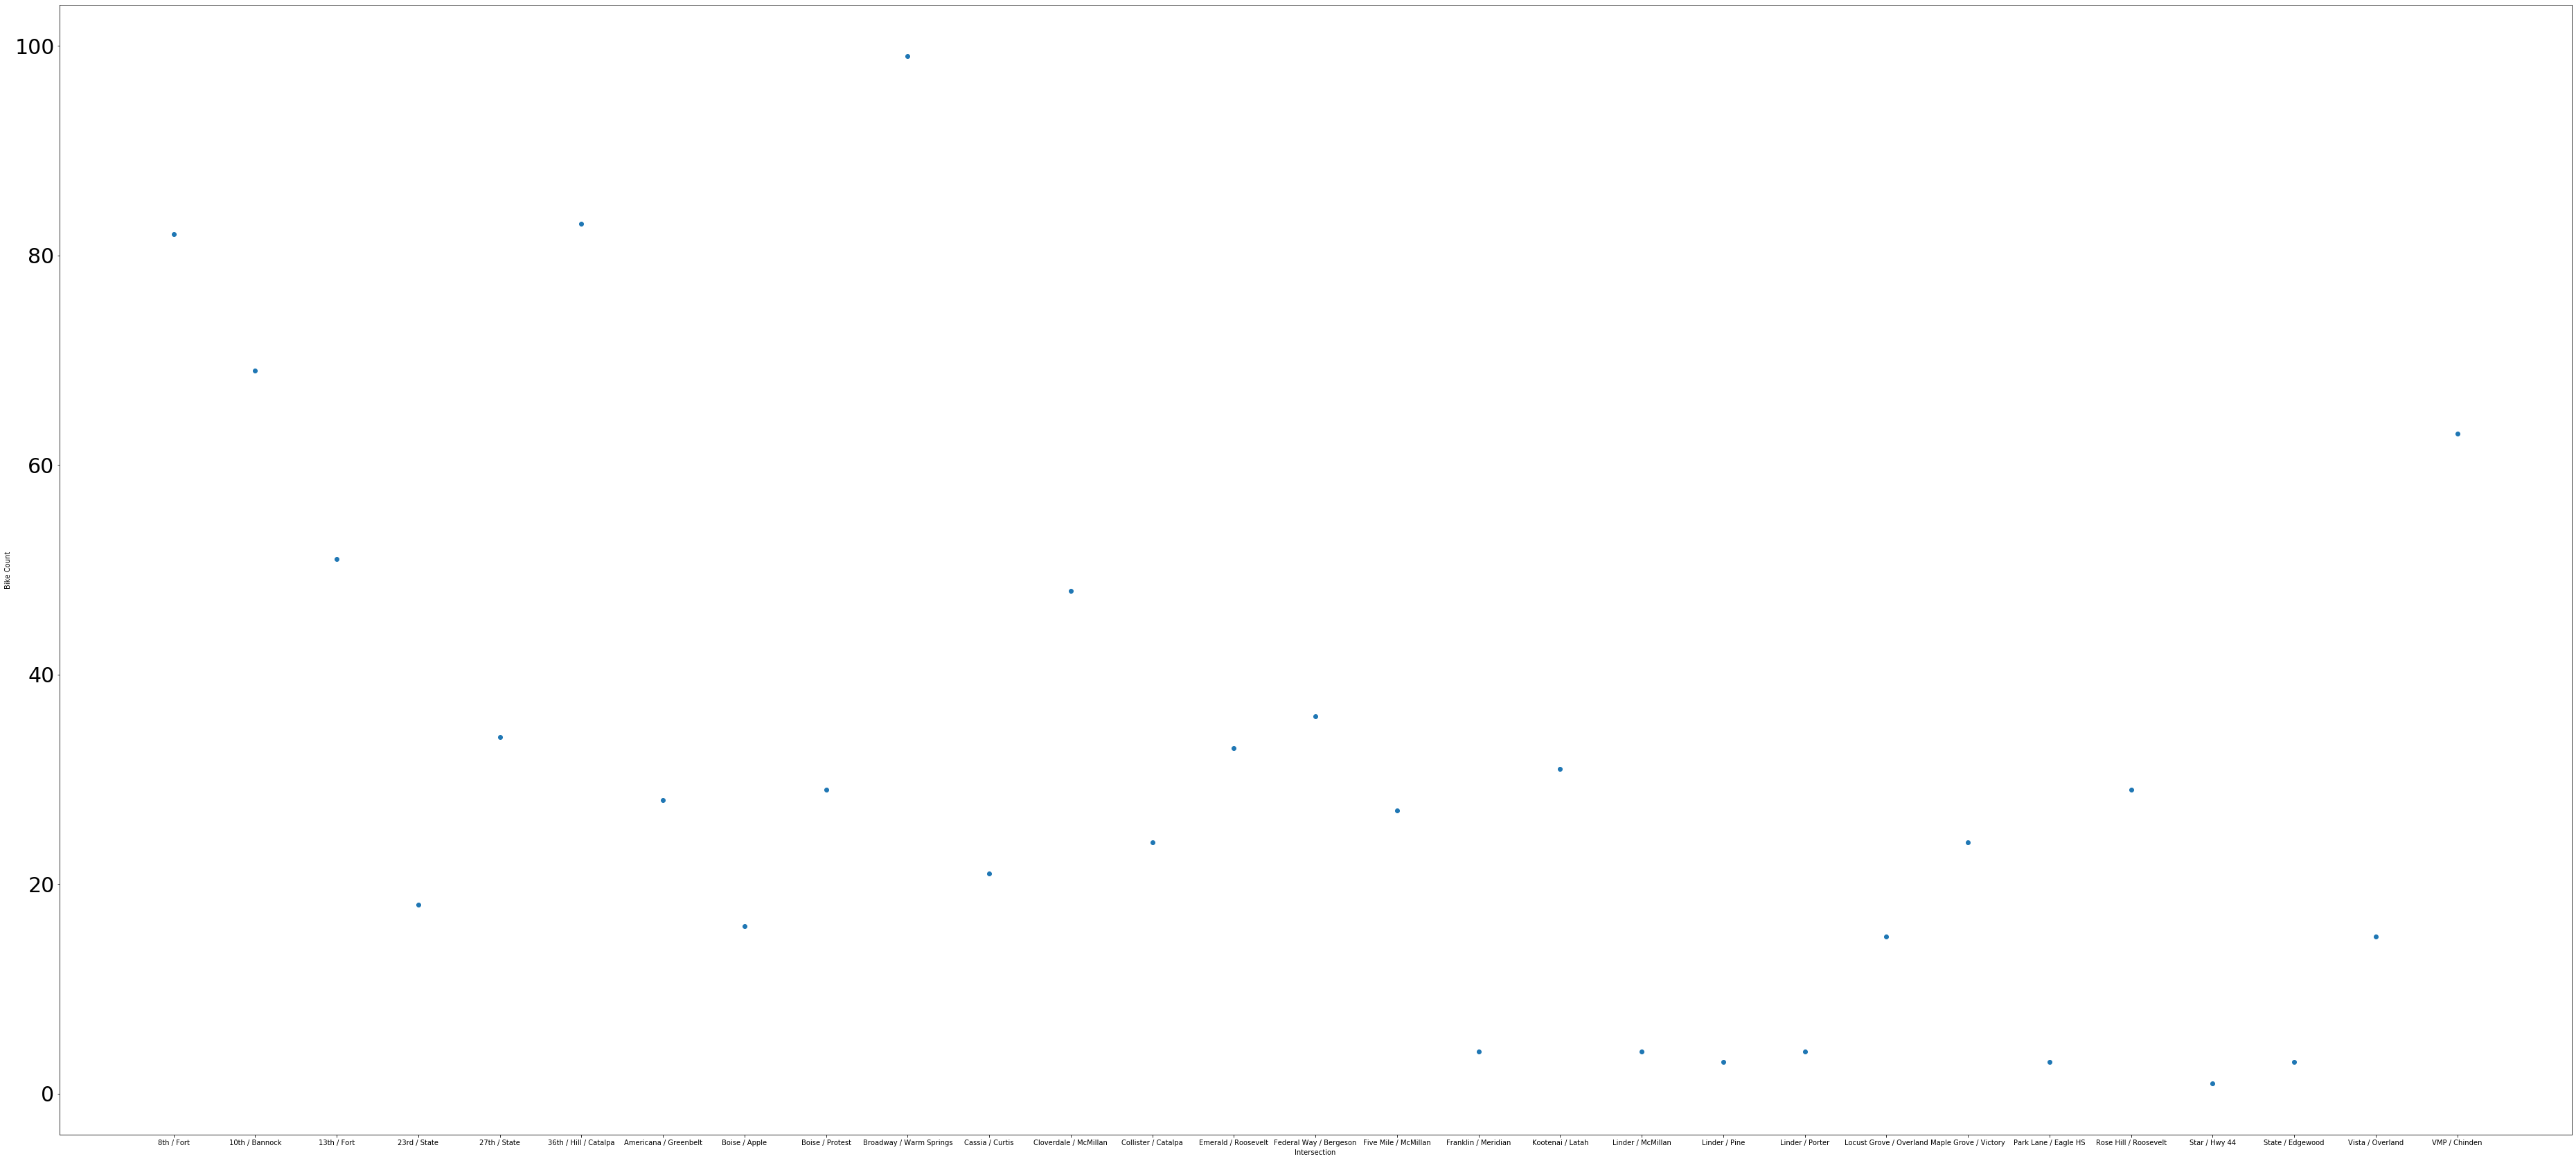

In [69]:
plt.rc('ytick', labelsize=30) 
plt.figure(figsize=(65,30))
plt.scatter(data_2007_trimmed['Location'], data_2007_trimmed['Total'])
plt.xlabel('Intersection')
plt.ylabel('Bike Count')

Text(0, 0.5, 'Bike Count')

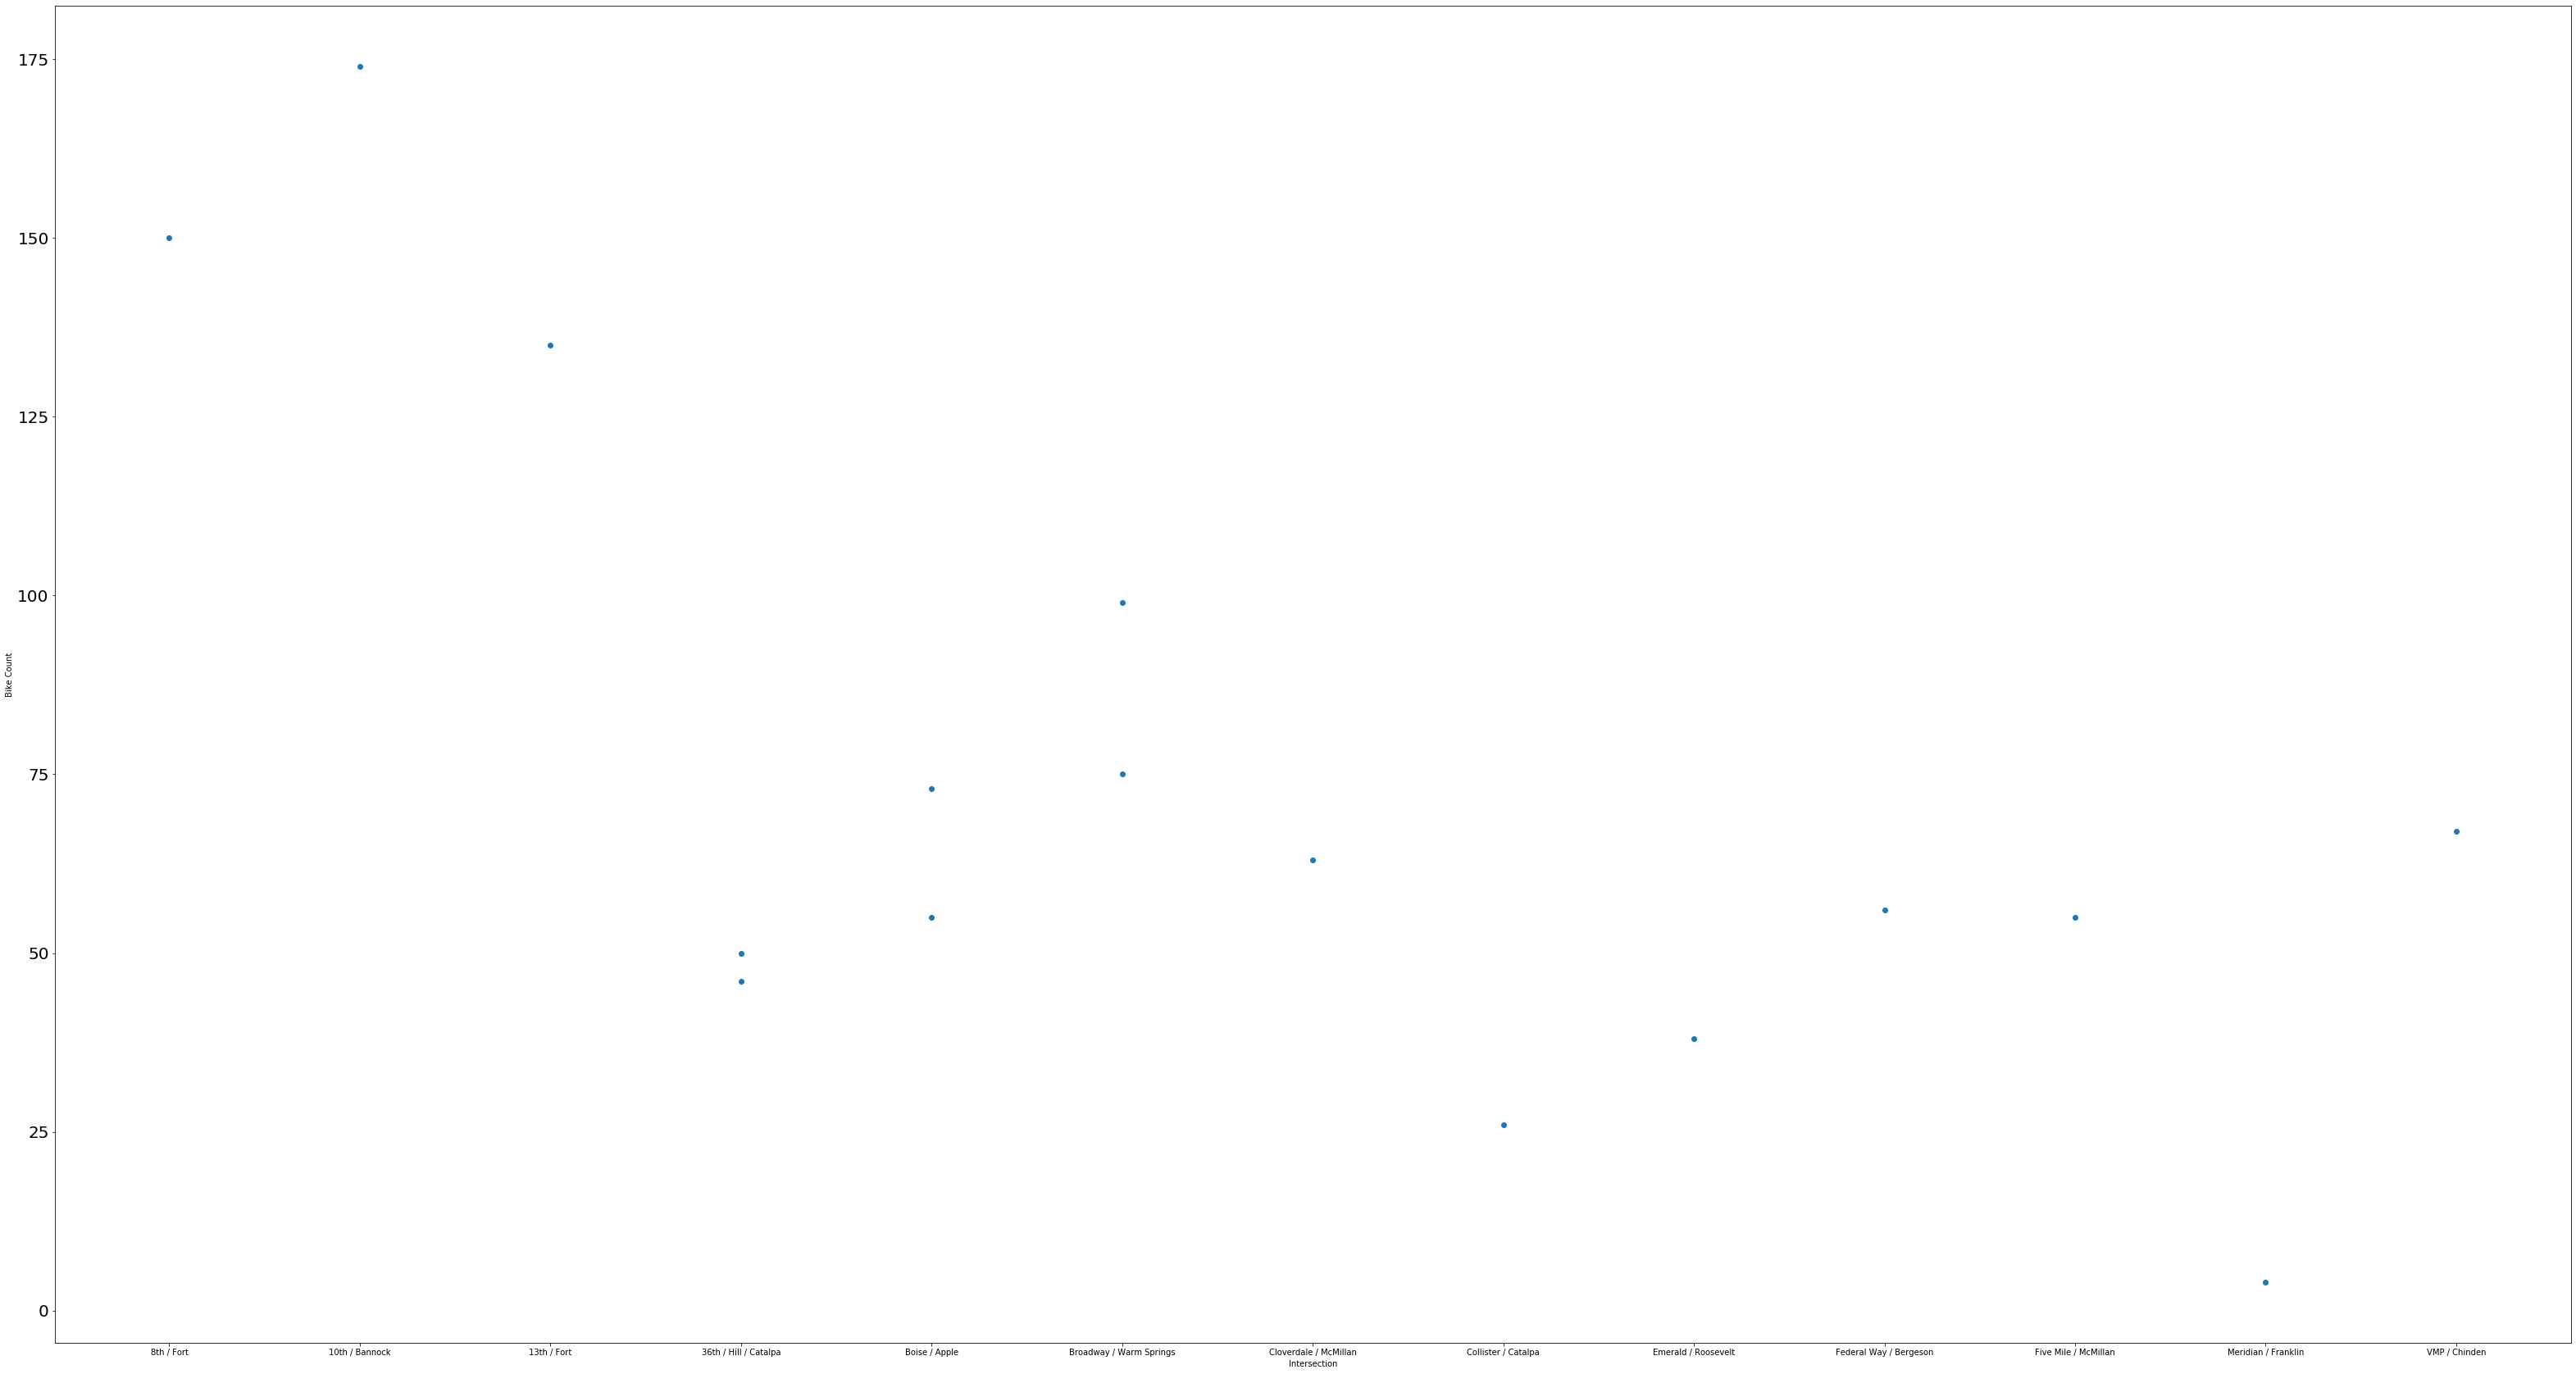

In [70]:
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(55,30))
plt.scatter(data_2008_trimmed['Location'], data_2008_trimmed['Total'])
plt.xlabel('Intersection')
plt.ylabel('Bike Count')

Text(0, 0.5, 'Bike Count')

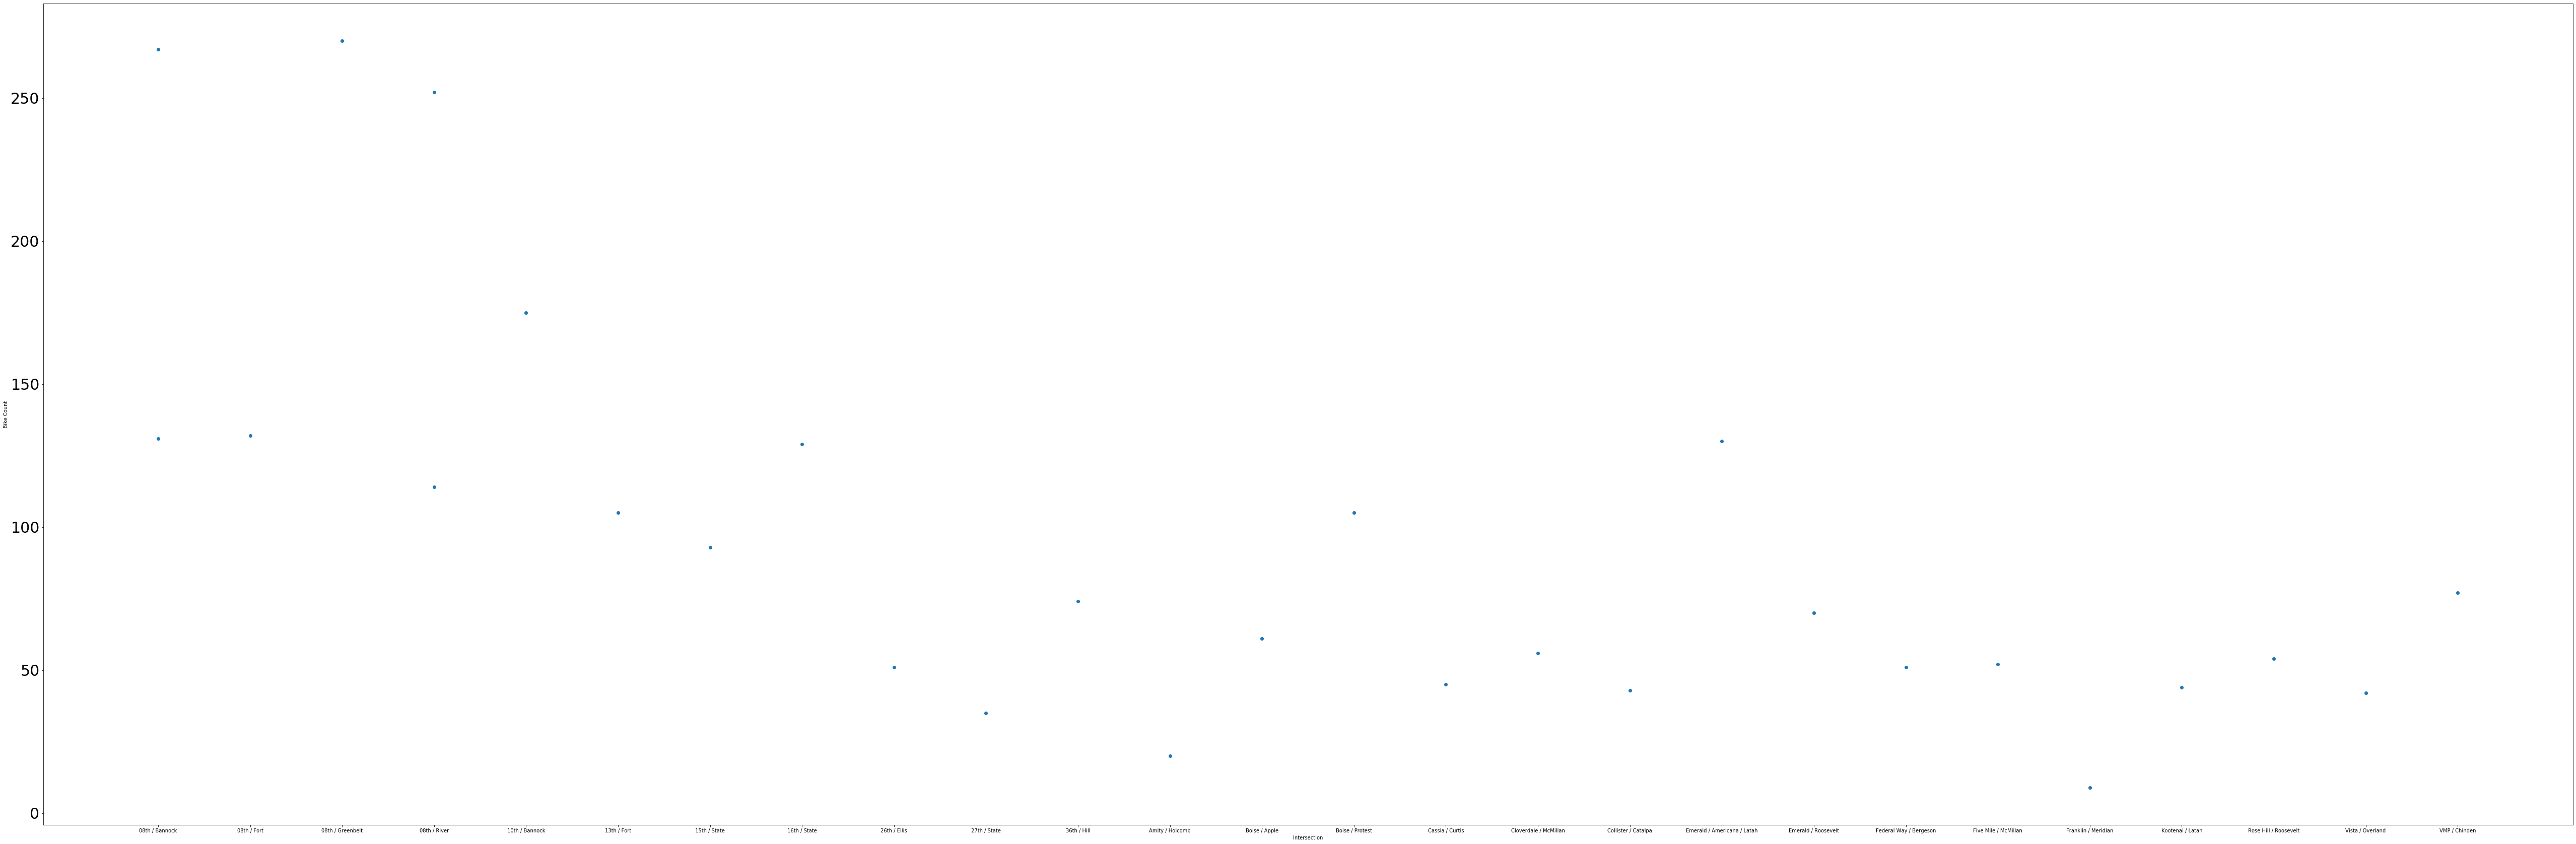

In [71]:
plt.rc('ytick', labelsize=30) 
plt.figure(figsize=(90,30))
plt.scatter(data_2010_trimmed['Location'], data_2010_trimmed['Total'])
plt.xlabel('Intersection')
plt.ylabel('Bike Count')

Text(0, 0.5, 'Bike Count')

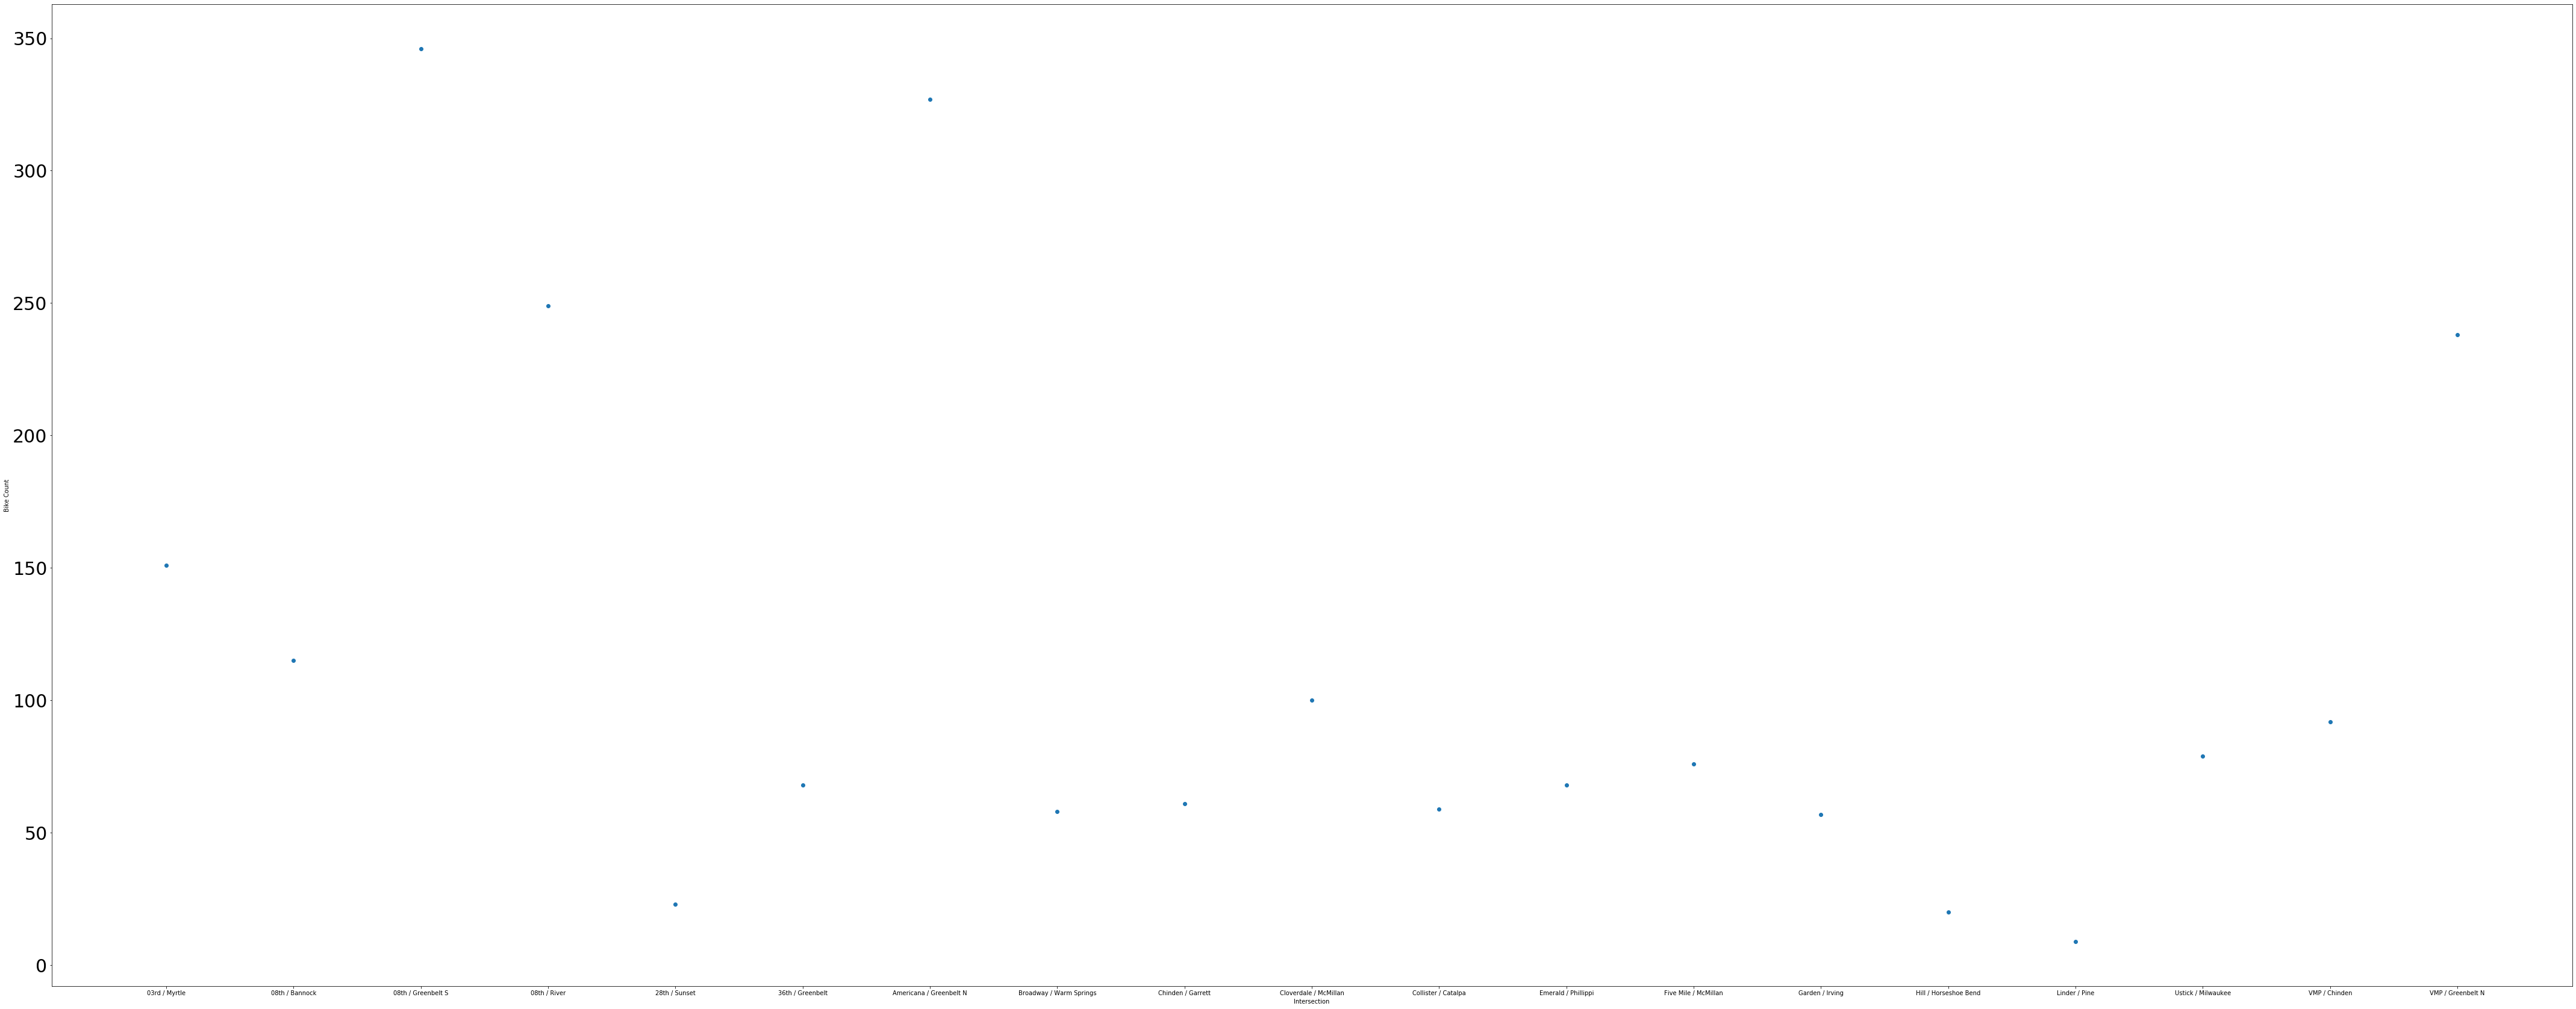

In [72]:
plt.rc('ytick', labelsize=30) 
plt.figure(figsize=(75,30))
plt.scatter(data_2011_trimmed['Location'], data_2011_trimmed['Total'])
plt.xlabel('Intersection')
plt.ylabel('Bike Count')

##### Usage Trends

Let us look at the usage trend for a given street year wise using overall data.

In [73]:
data_overall.head()

,Street_name,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average
0,Bannock,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52.0
1,Myrtle,03rd / Myrtle,0.0,151.0,0.0,0.0,59.0,150.0,95.0,133.0,0.0,0.0,588,117.6
2,Idaho,05th / Idaho,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,28,28.0
3,O'Farrell,06th / O'Farrell,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,62,62.0
4,Union,06th / Union,0.0,0.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,137,137.0


Let us take only the required data.

In [74]:
time_visualize = data_overall.drop(columns=['Total','Average','Street_name'])
time_visualize.head()

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May
0,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
1,03rd / Myrtle,0.0,151.0,0.0,0.0,59.0,150.0,95.0,133.0,0.0,0.0
2,05th / Idaho,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
3,06th / O'Farrell,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0
4,06th / Union,0.0,0.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0


Using melt function to make a separate date coumn.

In [75]:
time_count = time_visualize.melt(id_vars=["Location"], 
        var_name="Date", 
        value_name="Value")
time_count.head()

,Location,Date,Value
0,03rd / Bannock,2010,0.0
1,03rd / Myrtle,2010,0.0
2,05th / Idaho,2010,0.0
3,06th / O'Farrell,2010,0.0
4,06th / Union,2010,0.0


We need to analyse the pattern hidden in the utilization of streets for cycling over the time.

In [76]:

time_count['Date']= pd.to_datetime(time_count['Date']) 

In [77]:
plt_count = time_count.groupby([pd.Grouper(key='Date', freq='Y'),'Location']).sum()['Value']
plt_count.head()

Date        Location        
2010-12-31  03rd / Bannock      0.0
            03rd / Myrtle       0.0
            05th / Idaho        0.0
            06th / O'Farrell    0.0
            06th / Union        0.0
Name: Value, dtype: float64

In [78]:
plt_count_sum= plt_count.replace(0.0, np.nan)
plt_count_sum.head()

Date        Location        
2010-12-31  03rd / Bannock     NaN
            03rd / Myrtle      NaN
            05th / Idaho       NaN
            06th / O'Farrell   NaN
            06th / Union       NaN
Name: Value, dtype: float64

In [79]:
plot_count = pd.DataFrame(plt_count_sum)
plot_count.head()

Value
Date       Location               
2010-12-31 03rd / Bannock      NaN
           03rd / Myrtle       NaN
           05th / Idaho        NaN
           06th / O'Farrell    NaN
           06th / Union        NaN

In [80]:


#sns.lineplot('Location', 'Value', data=plot_busy)





Text(0.5, 0, 'Time')

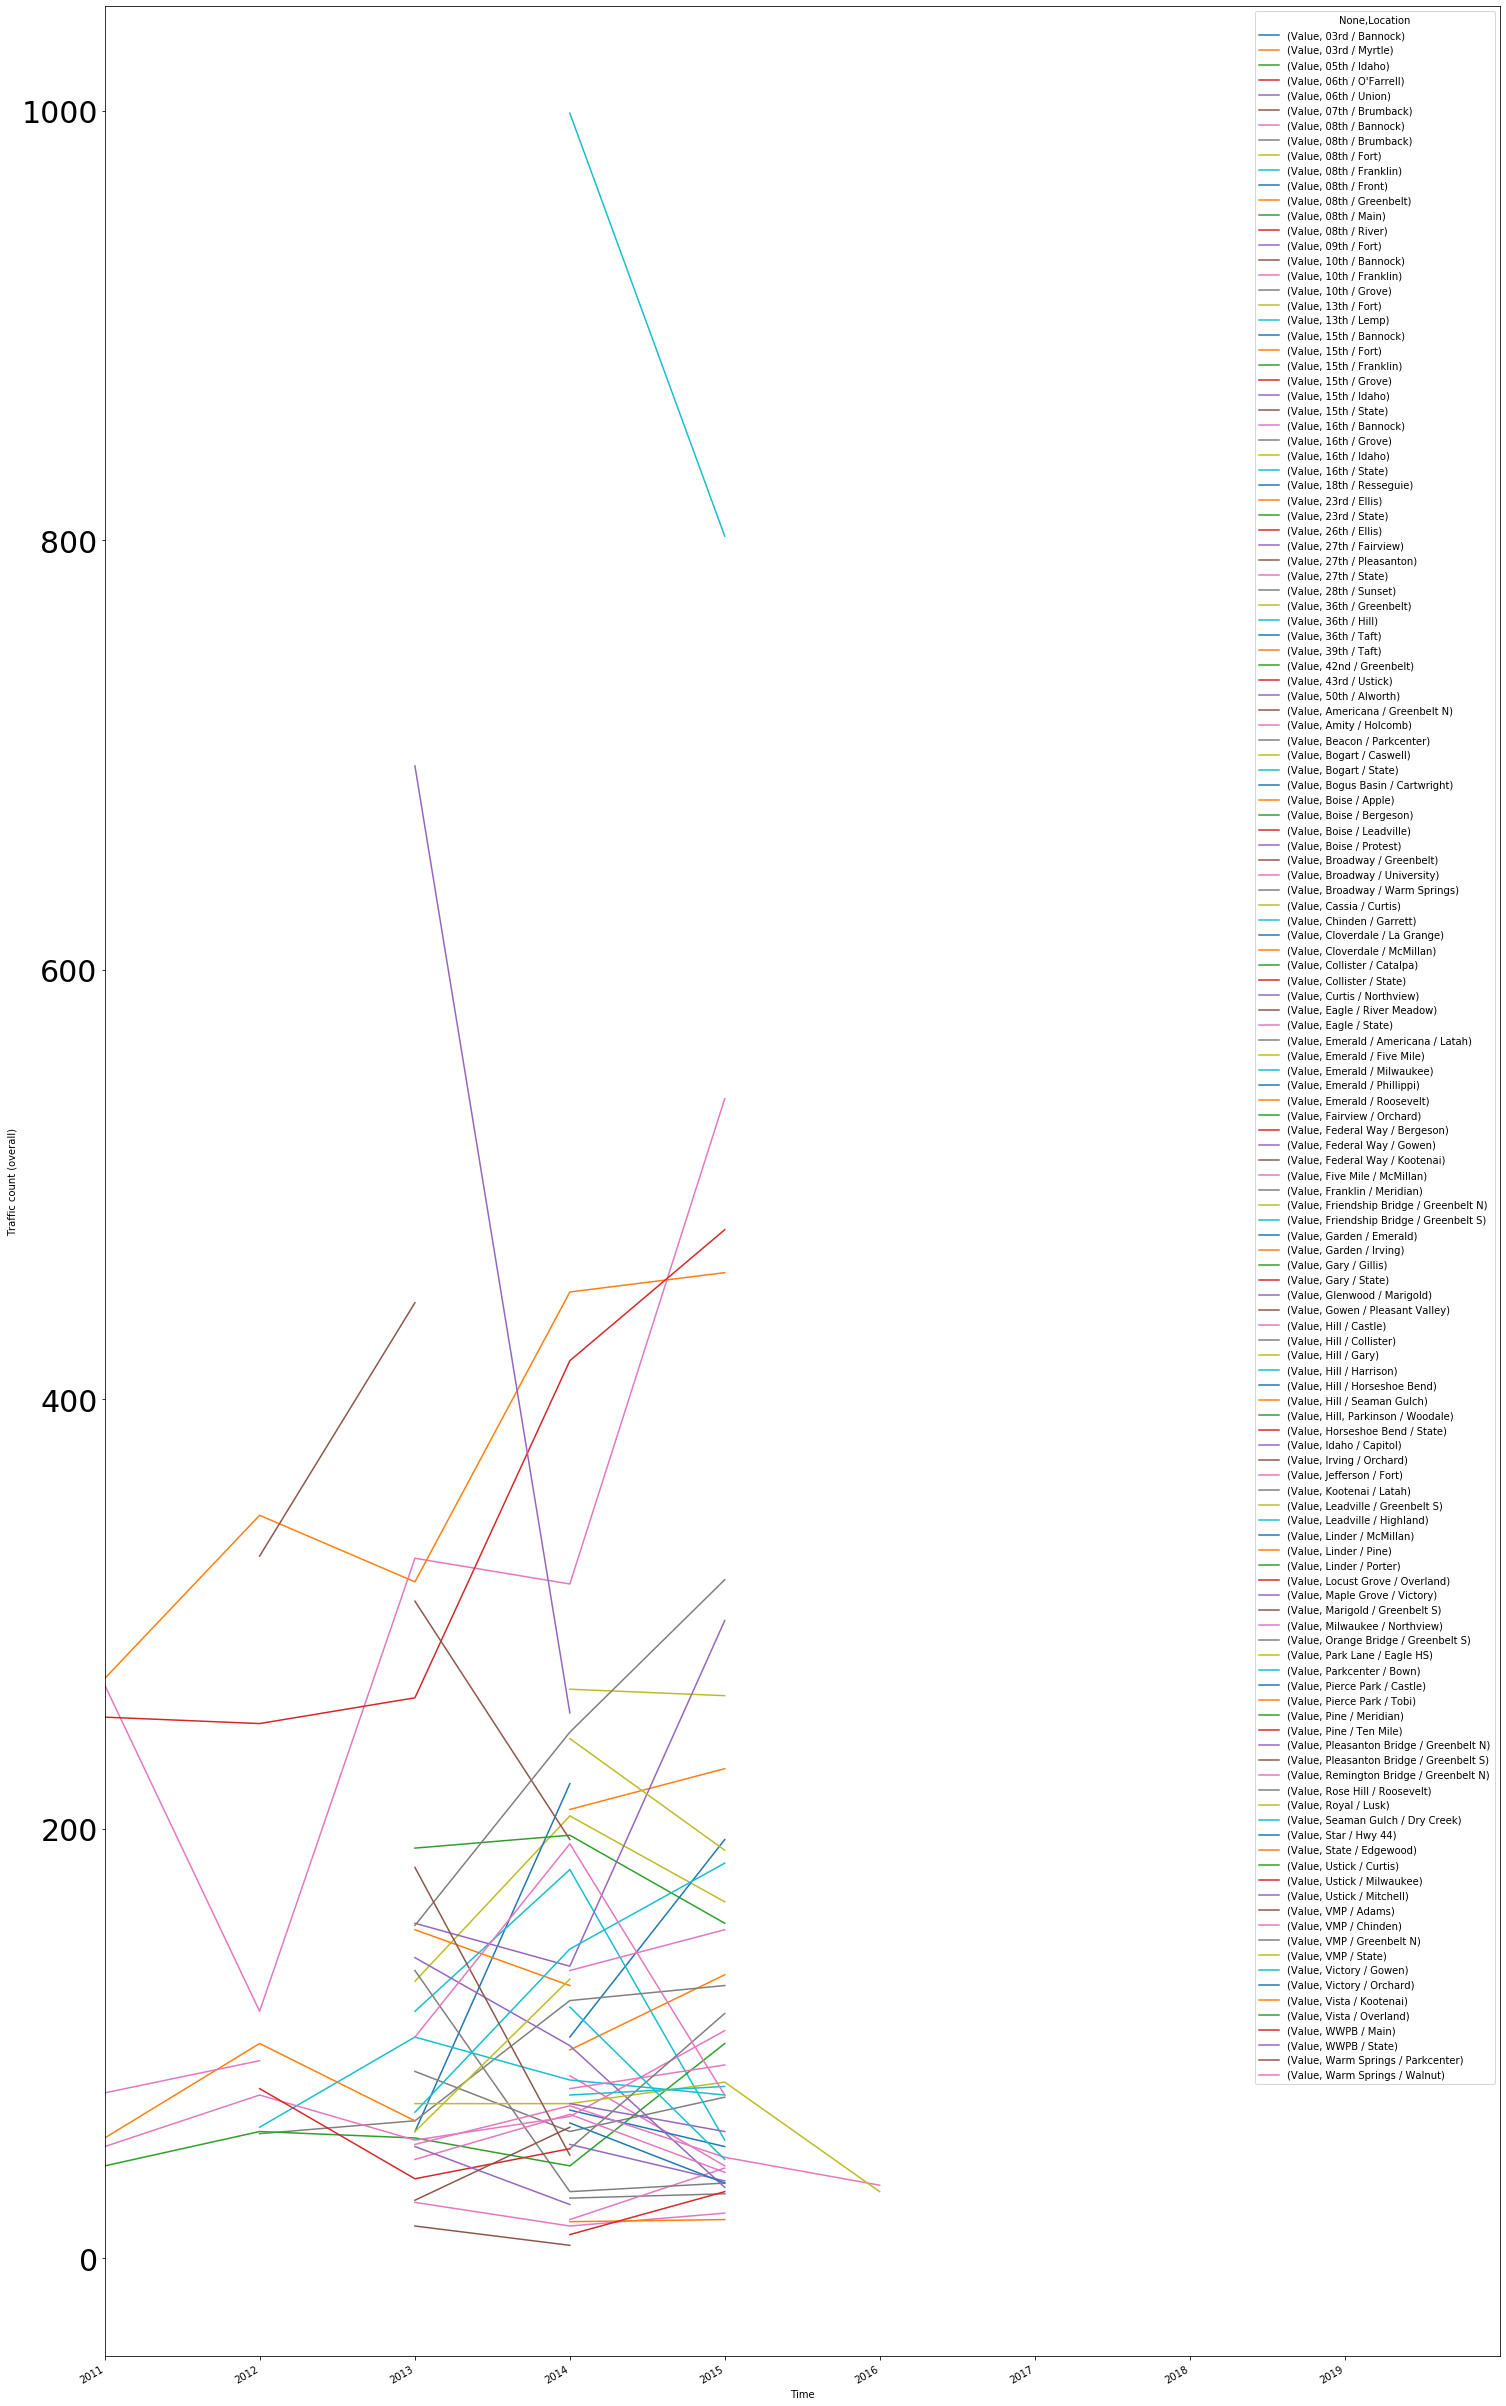

In [81]:
#count_traffic= pd.DataFrame(plt_count)
plot_count = pd.DataFrame(plt_count_sum)
plot_count.unstack().plot(figsize=(25,48))
plt.ylabel("Traffic count (overall)")
plt.xlabel("Time")


For our **RQ1**. To find the busiest street and the traffic count.
This plot help us realize that Friendship bridge/greenbelt was once heavily used by the cyclists,in 2019 this has reduced and this is an example of a busy street nearby to the greenbelt.

We will be splitting up the streets to further analyse the speed limits and traffic.

*Finding the top 5 intersections/streets with maximum traffic.*

In [82]:
count_traffic = plot_count['Value'].nlargest(5)
count_traffic

Date        Location                       
2013-12-31  Friendship Bridge / Greenbelt S    999.0
2014-12-31  Friendship Bridge / Greenbelt S    802.0
2012-12-31  Pleasanton Bridge / Greenbelt N    695.0
2014-12-31  08th / Bannock                     540.0
            08th / River                       479.0
Name: Value, dtype: float64

In [83]:
top_st = pd.DataFrame(count_traffic)
top_st

Value
Date       Location                              
2013-12-31 Friendship Bridge / Greenbelt S  999.0
2014-12-31 Friendship Bridge / Greenbelt S  802.0
2012-12-31 Pleasanton Bridge / Greenbelt N  695.0
2014-12-31 08th / Bannock                   540.0
           08th / River                     479.0

In [84]:
time_count.head()

,Location,Date,Value
0,03rd / Bannock,2010-01-01,0.0
1,03rd / Myrtle,2010-01-01,0.0
2,05th / Idaho,2010-01-01,0.0
3,06th / O'Farrell,2010-01-01,0.0
4,06th / Union,2010-01-01,0.0


Find the usage trend for these streets.

In [85]:
Green_count_traffic = time_count[(time_count['Location']=='Pleasanton Bridge / Greenbelt N') | 
                                 (time_count['Location']== 'Friendship Bridge / Greenbelt S') | (time_count['Location']== '08th / Bannock')
                                | (time_count['Location']== '08th / River') | (time_count['Location']== '08th / Greenbelt')]
Green_count_traffic.head()

,Location,Date,Value
6,08th / Bannock,2010-01-01,267.0
11,08th / Greenbelt,2010-01-01,270.0
13,08th / River,2010-01-01,252.0
79,Friendship Bridge / Greenbelt S,2010-01-01,0.0
114,Pleasanton Bridge / Greenbelt N,2010-01-01,0.0


In [86]:
plt_green = Green_count_traffic.groupby([pd.Grouper(key='Date', freq='Y'),'Location']).sum()['Value']
plt_green.head()

Date        Location                       
2010-12-31  08th / Bannock                     267.0
            08th / Greenbelt                   270.0
            08th / River                       252.0
            Friendship Bridge / Greenbelt S      0.0
            Pleasanton Bridge / Greenbelt N      0.0
Name: Value, dtype: float64

In [87]:
green_plot = plt_green.replace(0.0, np.nan)

Let us plot and see the traffic pattern in the top 5 intersections over the years.

Text(0.5, 0, 'Time')

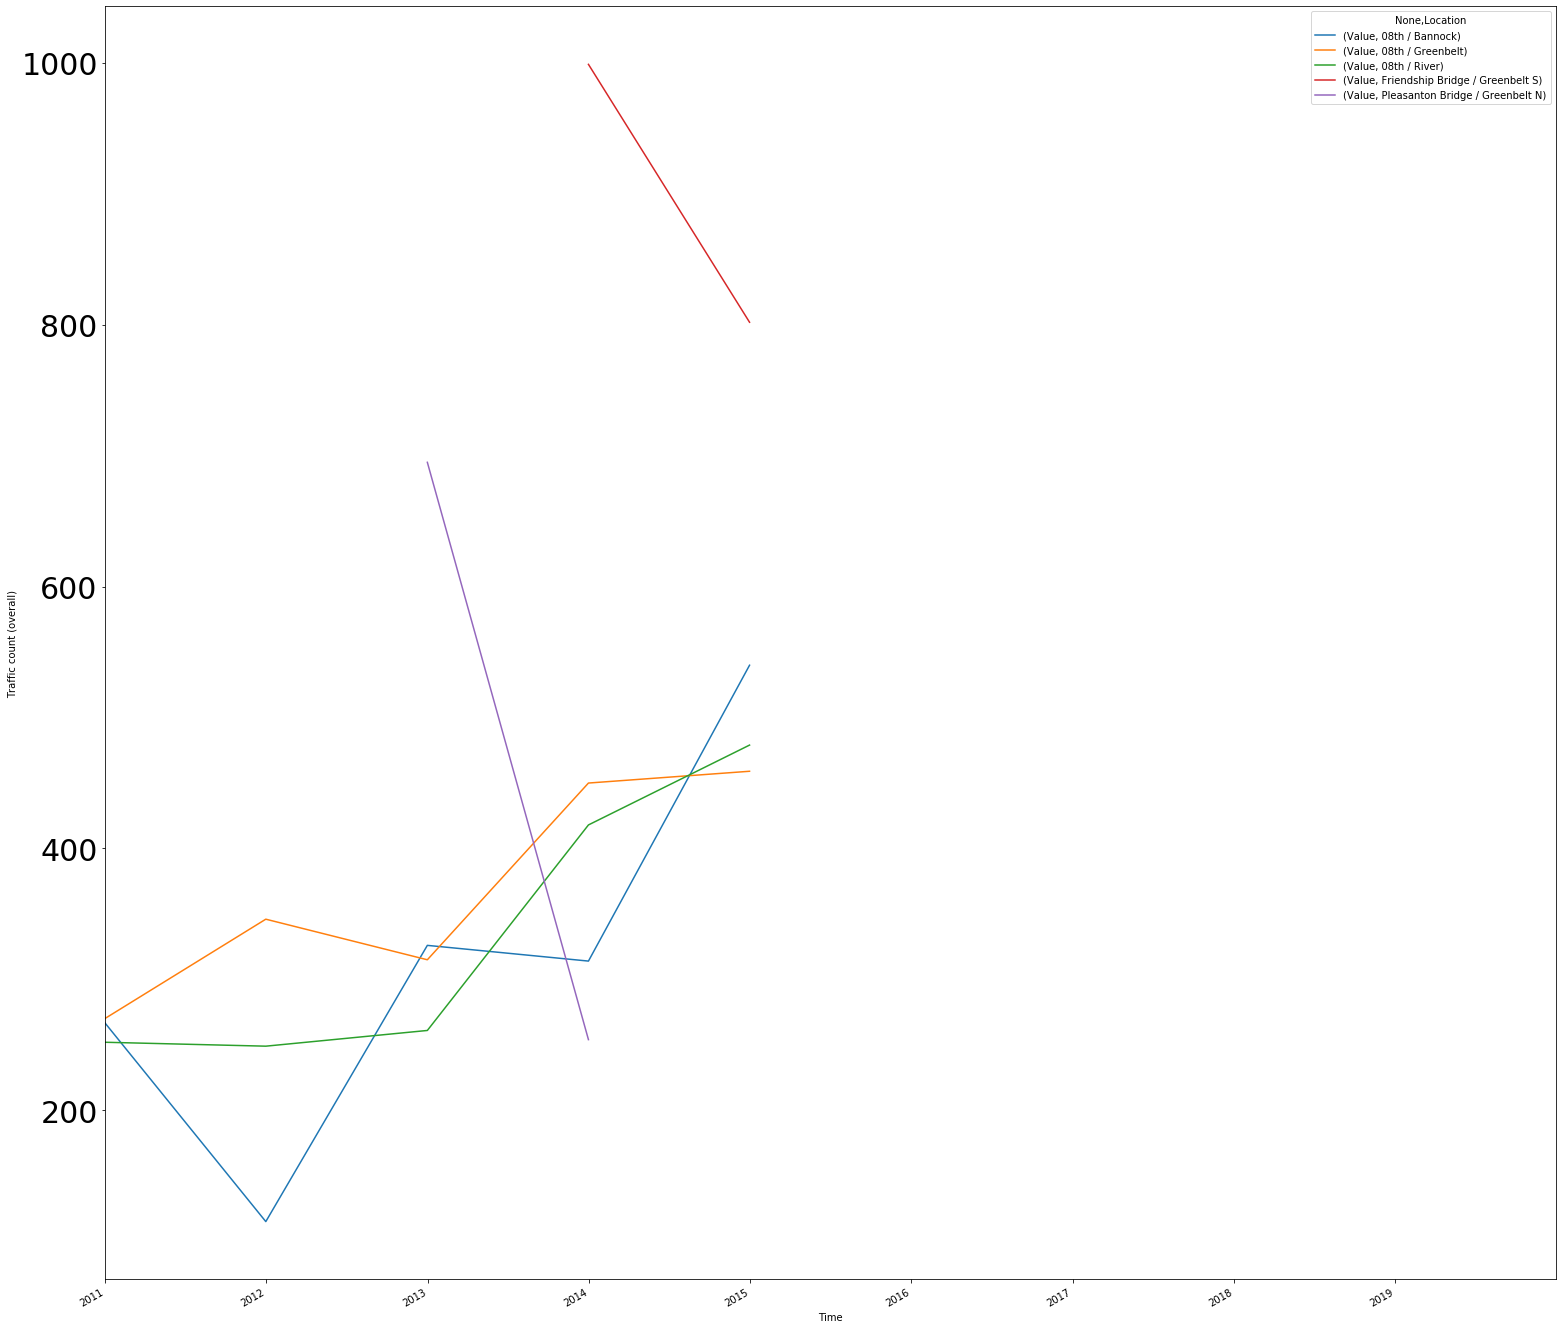

In [88]:
count_traf= pd.DataFrame(green_plot)

count_traf.unstack().plot(figsize=(26,26))
plt.ylabel("Traffic count (overall)")
plt.xlabel("Time")

**Inferences :**

- Friendship bridge has seen steep drop in bike traffic from 2014 to 2015.
- 08/river and bannock intersections are currently being heavily used by cyclists.


## Speed Limits and Streets

Let us look at the bike dbf file.

In [89]:
Bike_DF = bike_dbf.to_dataframe()
Bike_DF.head()

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
0,6986.963846,ACHD,1995,ARTERIAL,Bike Lane,2016-08-09,E,Warm Springs,Ave,1.323289,30,Boise,Avenue C-Old Penitentiary,2.646577,2,NaN,NaN,6986.963846
1,457.445459,ACHD,2003,LOCAL,Bike Lane,2016-08-12,S,Riverstone,Ln,0.086637,15,Boise,River Run-Riverpark,0.173275,2,NaN,NaN,457.445459
2,4774.728140,ACHD,1995,COLLECTOR,Bike Lane,2016-08-12,E,River Run,Dr,0.904305,20,Boise,Parkcenter-Parkcenter,1.808609,2,NaN,NaN,4774.728140
3,5316.741855,ACHD,1996,COLLECTOR,Bike Lane,2016-08-17,W,Desert,Ave,1.006959,30,Ada,Maple Grove-Cole,2.013917,2,NaN,NaN,5316.741855
4,2190.112489,ACHD,2000,ARTERIAL,Bike Lane,2016-06-27,W,Hill,Pkwy,0.414794,35,Boise,Horseshoe Bend-Gary,0.829588,2,NaN,NaN,2190.112489


We are interested in only Speed and street names

In [90]:
bike_speed = Bike_DF[['StName','SpeedLimit','FCLASS']]


In [91]:
bike_speed[bike_speed['StName']=='Parkcenter']

,StName,SpeedLimit,FCLASS
1132,Parkcenter,35,ARTERIAL
1142,Parkcenter,45,LOCAL
1143,Parkcenter,45,LOCAL
1144,Parkcenter,35,ARTERIAL
1145,Parkcenter,35,LOCAL
1146,Parkcenter,35,LOCAL
1175,Parkcenter,35,ARTERIAL


In [92]:
bike_speed[bike_speed['StName']=='Mountain View']

,StName,SpeedLimit,FCLASS
17,Mountain View,25,COLLECTOR
26,Mountain View,20,LOCAL
101,Mountain View,25,COLLECTOR
431,Mountain View,20,LOCAL
969,Mountain View,25,ARTERIAL
987,Mountain View,25,COLLECTOR


This street has speedlimits 20 and 25 because of a school nearby.

dropping duplicates.

In [93]:
bike_speed.drop_duplicates(subset=None, keep='first', inplace=True)


C:\Users\Admini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Find average speed limits.

In [94]:
bike_avg = bike_speed.groupby(['FCLASS','StName'])['SpeedLimit'].mean()
bike_speed_avg = pd.DataFrame(bike_avg)
bike_speed_avg.head()

SpeedLimit
FCLASS   StName               
ARTERIAL 15th             30.0
         16th             25.0
         27th             30.0
         36th             32.5
         Americana        30.0

Find Maximum of 2 speed limits in a street.

In [95]:
bike_max = bike_speed.groupby(['FCLASS','StName'])['SpeedLimit'].max()
bike_speed_max = pd.DataFrame(bike_max)
bike_speed_max.head()

SpeedLimit
FCLASS   StName               
ARTERIAL 15th               30
         16th               30
         27th               30
         36th               35
         Americana          30

In [96]:
#data_overall['Street_name'] = data_overall['Street_name'].map(lambda x: x.lstrip('/').rstrip('aAbBcC'))
#data_overall

Street names look good to merge.

Quick look at the number of rows and columns in both dataframes.

In [97]:
data_overall['Location'].nunique() # master summary file

137

In [98]:
bike_speed['StName'].nunique()

590

Master file has bike count record for few street.We are merging this for average speed data.

In [99]:
data_count_speed = pd.merge(data_overall, bike_speed_avg, how='inner', left_on='Street_name', right_on='StName')
data_count_speed.head()

,Street_name,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average,SpeedLimit
0,Bannock,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52.00,20.0
1,Bannock,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52.00,20.0
2,Bannock,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165.0,234.0,306.0,0.0,0.0,1562,195.25,20.0
3,Bannock,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165.0,234.0,306.0,0.0,0.0,1562,195.25,20.0
4,Bannock,10th / Bannock,175.0,0.0,185.0,0.0,0.0,0.0,102.0,192.0,0.0,0.0,897,149.50,20.0


Let us take columns that is important.

In [100]:
data_speedavg = data_count_speed.rename(columns={"SpeedLimit":"Average_speed"})

In [101]:
data_avg_spd = data_speedavg[['Location','Street_name','Total','Average','Average_speed']]
data_avg_spd.head()


,Location,Street_name,Total,Average,Average_speed
0,03rd / Bannock,Bannock,52,52.00,20.0
1,03rd / Bannock,Bannock,52,52.00,20.0
2,08th / Bannock,Bannock,1562,195.25,20.0
3,08th / Bannock,Bannock,1562,195.25,20.0
4,10th / Bannock,Bannock,897,149.50,20.0


Let us merge the maximum speed dataframe with master summary data.

In [102]:
data_count_max = pd.merge(data_overall, bike_speed_max, how='inner', left_on='Street_name', right_on='StName')
data_count_max.head()

,Street_name,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average,SpeedLimit
0,Bannock,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52.00,20
1,Bannock,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52.00,20
2,Bannock,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165.0,234.0,306.0,0.0,0.0,1562,195.25,20
3,Bannock,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165.0,234.0,306.0,0.0,0.0,1562,195.25,20
4,Bannock,10th / Bannock,175.0,0.0,185.0,0.0,0.0,0.0,102.0,192.0,0.0,0.0,897,149.50,20


In [103]:
data_speedmx = data_count_max.rename(columns={"SpeedLimit":"Max_speed"})

In [104]:
data_max_spd = data_speedavg[['Location','Street_name','Total','Average','Average_speed']]
data_max_spd.head()

,Location,Street_name,Total,Average,Average_speed
0,03rd / Bannock,Bannock,52,52.00,20.0
1,03rd / Bannock,Bannock,52,52.00,20.0
2,08th / Bannock,Bannock,1562,195.25,20.0
3,08th / Bannock,Bannock,1562,195.25,20.0
4,10th / Bannock,Bannock,897,149.50,20.0


**Inferences**

- Low speed limit on Bannock street is a reason for its popularity among bikers.

Now, we have to do sensitivity analysis on the outcomes of both average and maximum speed data.

Analyse the functional class of roads.